In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

In [2]:
# read csv
df = pd.read_csv('datasets/Processed_data.csv')

# take vectors and countries
vectors = df.iloc[:,1:].values
countries = df.iloc[:,0].values

In [3]:
# manhattan distance is used for binary data
def manhattan_distance(v1, v2):
    return np.sum(np.abs(v1 - v2))

In [4]:
col = np.array(['red', 'green', 'blue', 'orange', 'grey','purple'])
shapes = np.full((vectors.shape[0]), 'o')
stars = ['Iran','Kuwait','Qatar','Russia','Saudi Arabia','United Arab Emirates']
diamonds = ['Azerbaijan','Egypt','Libya','Oman']


for country in stars:
    print(country)
    index = np.where(countries == country)
    print(index)
    shapes[index] = '*'

for country in diamonds:
    print(country)
    index = np.where(countries == country)
    print(index)
    shapes[index] = 'D'

Iran
(array([37], dtype=int64),)
Kuwait
(array([42], dtype=int64),)
Qatar
(array([64], dtype=int64),)
Russia
(array([65], dtype=int64),)
Saudi Arabia
(array([67], dtype=int64),)
United Arab Emirates
(array([80], dtype=int64),)
Azerbaijan
(array([5], dtype=int64),)
Egypt
(array([21], dtype=int64),)
Libya
(array([43], dtype=int64),)
Oman
(array([57], dtype=int64),)


In [5]:
labels

array([0, 0, 0, 3, 0, 4, 4, 0, 4, 3, 0, 0, 3, 1, 3, 3, 1, 0, 3, 2, 2, 4,
       1, 3, 0, 0, 1, 3, 3, 1, 1, 3, 2, 1, 3, 1, 0, 4, 3, 4, 3, 4, 4, 0,
       3, 1, 3, 3, 1, 3, 1, 2, 1, 1, 0, 1, 2, 4, 1, 1, 3, 3, 0, 4, 4, 1,
       0, 1, 0, 3, 1, 0, 2, 0, 3, 4, 3, 0, 3, 0, 1, 0, 0, 1, 0, 1],
      dtype=uint16)

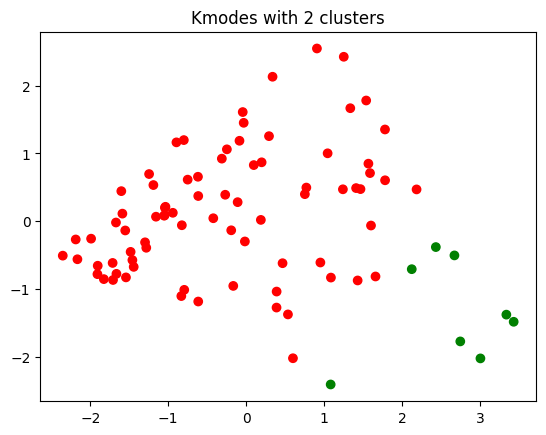

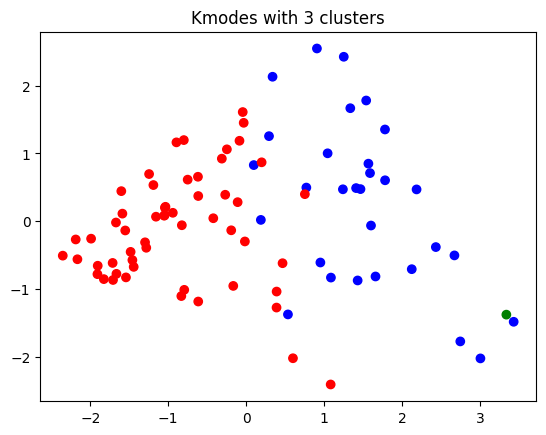

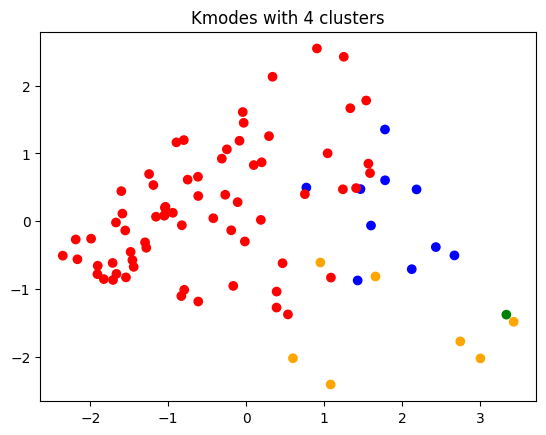

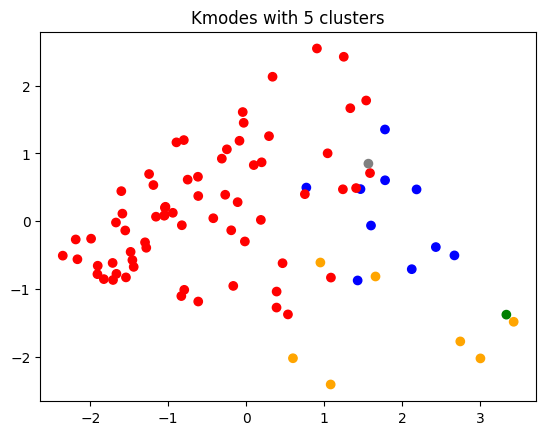

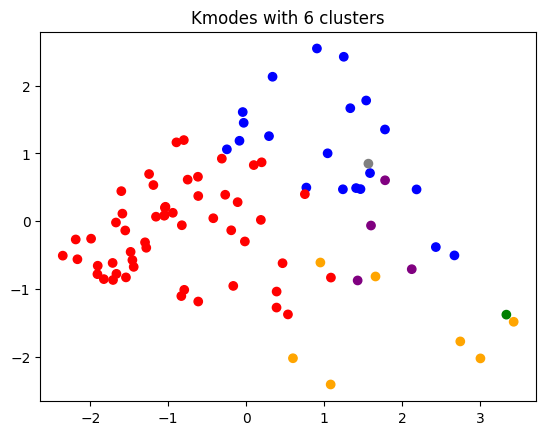

In [17]:
# plot 2d
from sklearn.decomposition import PCA
decomposer = PCA(n_components=2)
decomposer.fit(vectors)
vectors_2d = decomposer.transform(vectors)

# empty df with header cluster and country
df_clusters_mode = pd.DataFrame(columns=['Cluster', 'Country'])

# plot and give each label from kmeans different color
# do kmodes from 2 to 10 clusters
for i in range(2, 7):
    fig, ax = plt.subplots(1,1)
    kmodes = KModes(n_clusters=i, init='Cao', n_init=100, random_state=0).fit(vectors)
    labels = kmodes.labels_
    ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=col[labels])
    ax.title.set_text('Kmodes with ' + str(i) + ' clusters')
    # save in kmodes folder
    fig.savefig('Figures/kmodes_'+str(i)+ '.png', bbox_inches='tight')
    
    # add cluster with their countries to df
    for clus in range(i):
        name_cluster = str(i) + ' clusters: ' + col[clus]
        all_countries = countries[labels == clus]
        string = ''
        for country in all_countries:
            string += country + ', '
        string = string[:-2]
        df_clusters_mode = pd.concat([df_clusters_mode, pd.DataFrame({'Cluster': [name_cluster], 'Country': [string]})])

In [18]:
df_clusters_mode

,Cluster,Country
0,2 clusters: red,"African Group, AOSIS, Argentina, Armenia, Azer..."
0,2 clusters: green,"Australia, Cook Islands, Ecuador, EU, Monaco, ..."
0,3 clusters: red,"Armenia, Benin, Burkina Faso, Cambodia, Canada..."
0,3 clusters: green,Cook Islands
0,3 clusters: blue,"African Group, AOSIS, Argentina, Australia, Az..."
0,4 clusters: red,"Argentina, Armenia, Bahrain, Bangladesh, Barba..."
0,4 clusters: green,Cook Islands
0,4 clusters: blue,"African Group, AOSIS, Australia, Azerbaijan, C..."
0,4 clusters: orange,"Ecuador, Gabon, HAC, Monaco, Norway, Peru, Swi..."
0,5 clusters: red,"Argentina, Armenia, Bahrain, Bangladesh, Barba..."


In [19]:
# save as excel
df_clusters_mode.to_excel('datasets/Clusters_mode_Cao.xlsx', index=False)

IndexError: index 6 is out of bounds for axis 0 with size 6

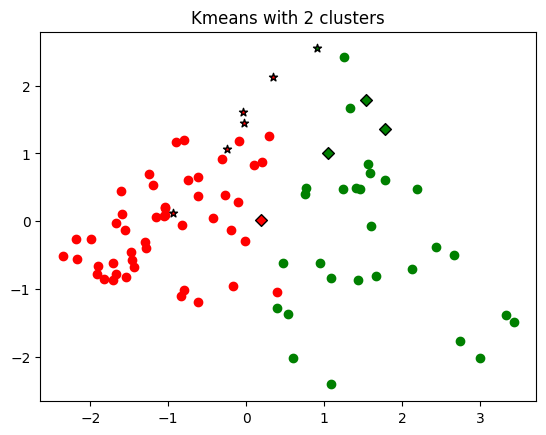

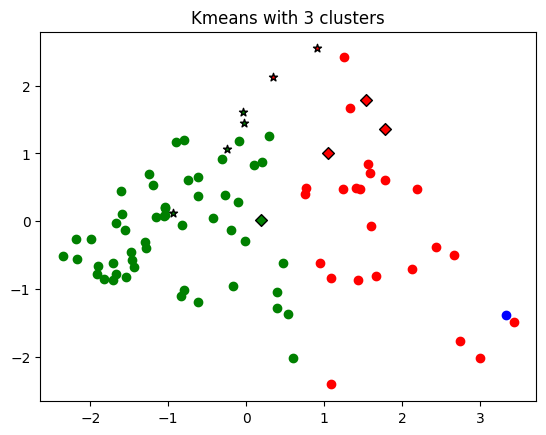

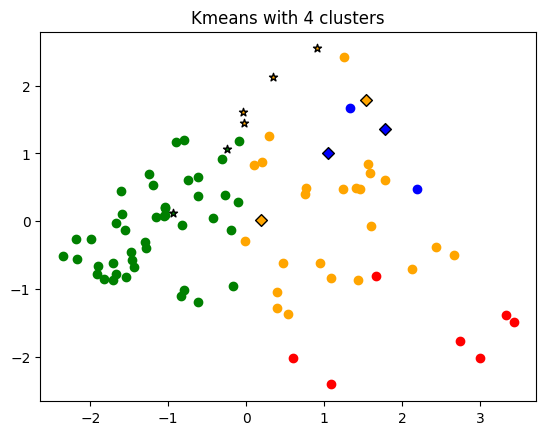

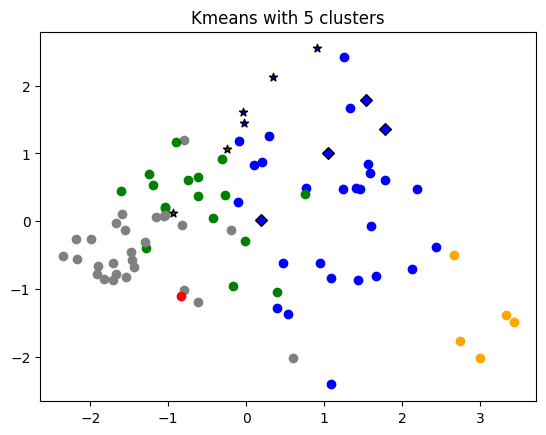

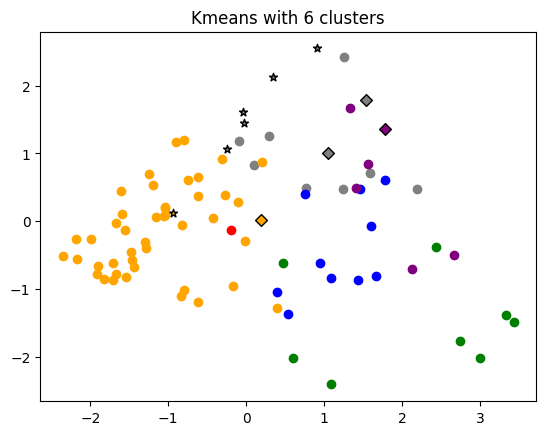

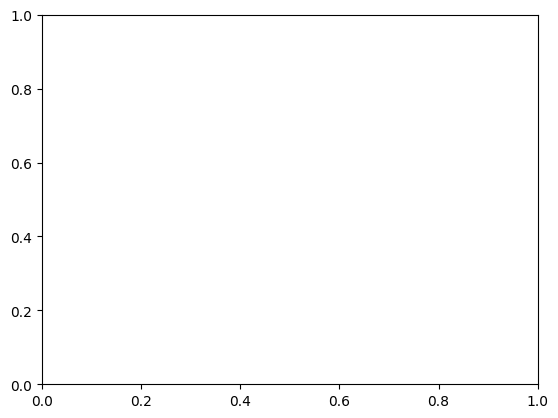

In [8]:
# plot 2d
from sklearn.decomposition import PCA
decomposer = PCA(n_components=2)
decomposer.fit(vectors)
vectors_2d = decomposer.transform(vectors)

# empty df with header cluster and country
df_clusters = pd.DataFrame(columns=['Cluster', 'Country'])

# plot and give each label from kmeans different color
# do kmeans from 2 to 10 clusters
for i in range(2, 8):
    fig, ax = plt.subplots(1,1)
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(vectors)
    labels = kmeans.labels_
    for j in range(len(countries)):
        x, y = vectors_2d[j, :]
        if shapes[j] == 'o':
            edge = 'face'
        if shapes[j] == '*':
            edge = 'black'
        if shapes[j] == 'D':
            edge = 'black'
        ax.scatter(x, y, c=col[labels[j]], marker=shapes[j], edgecolors=edge)
    ax.title.set_text('Kmeans with ' + str(i) + ' clusters')
    # save in kmeans folder
    fig.savefig('Figures/Kmeans/kmeans_'+str(i)+ '.png', bbox_inches='tight')
    
    # add cluster with their countries to df
    for clus in range(i):
        name_cluster = str(i) + ' clusters: ' + col[clus]
        all_countries = countries[labels == clus]
        string = ''
        for country in all_countries:
            string += country + ', '
        string = string[:-2]
        df_clusters = pd.concat([df_clusters, pd.DataFrame({'Cluster': [name_cluster], 'Country': [string]})])

In [14]:
# save df to excel
df_clusters_mode.to_excel('datasets/Clusters_mode_2.xlsx', index=False)

In [66]:
# save df to excel
df_clusters.to_excel('datasets/Clusters.xlsx', index=False)

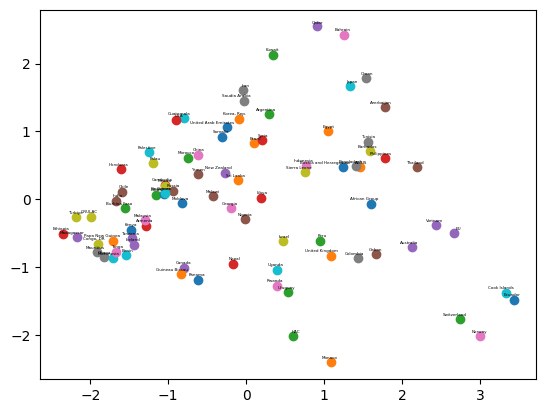

In [8]:
from sklearn.decomposition import PCA
decomposer = PCA(n_components=2)
decomposer.fit(vectors)
vectors_2d = decomposer.transform(vectors)

for i, country in enumerate(countries):
    x, y = vectors_2d[i, :]
    plt.scatter(x, y)
    plt.annotate(country, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom', fontsize=3)

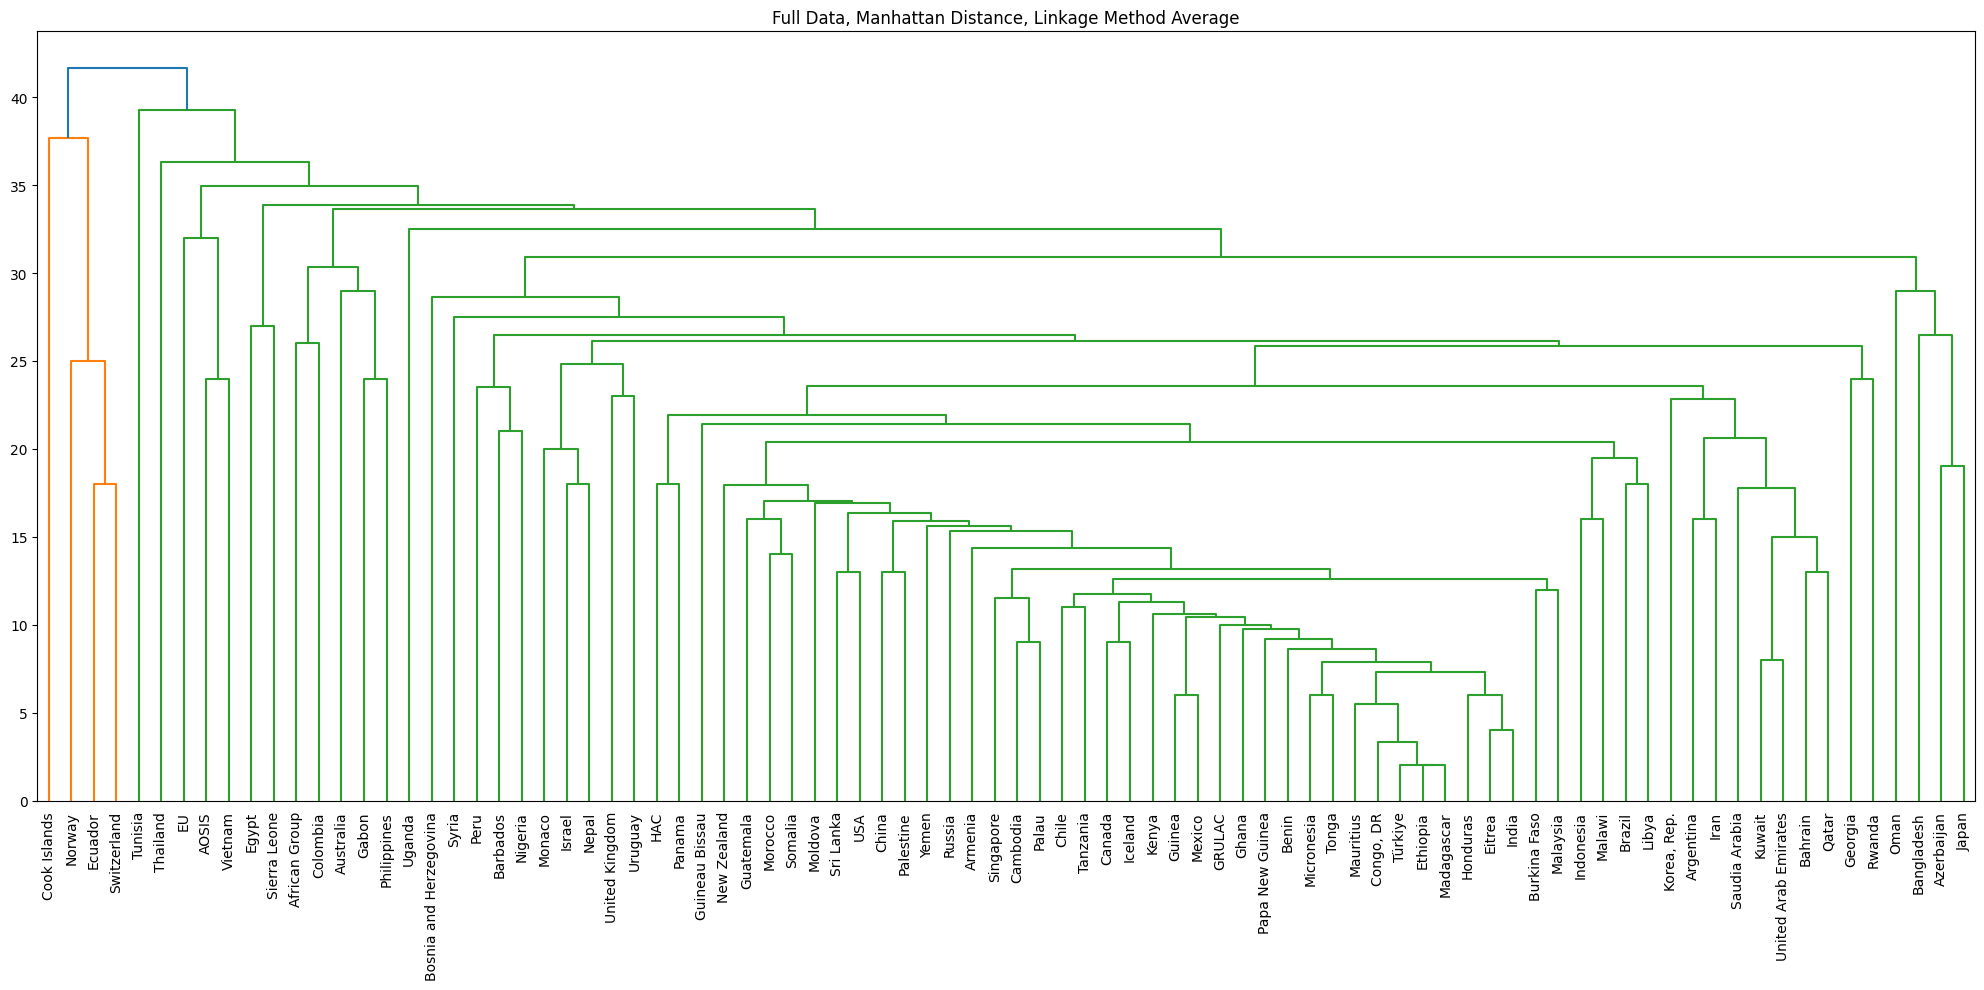

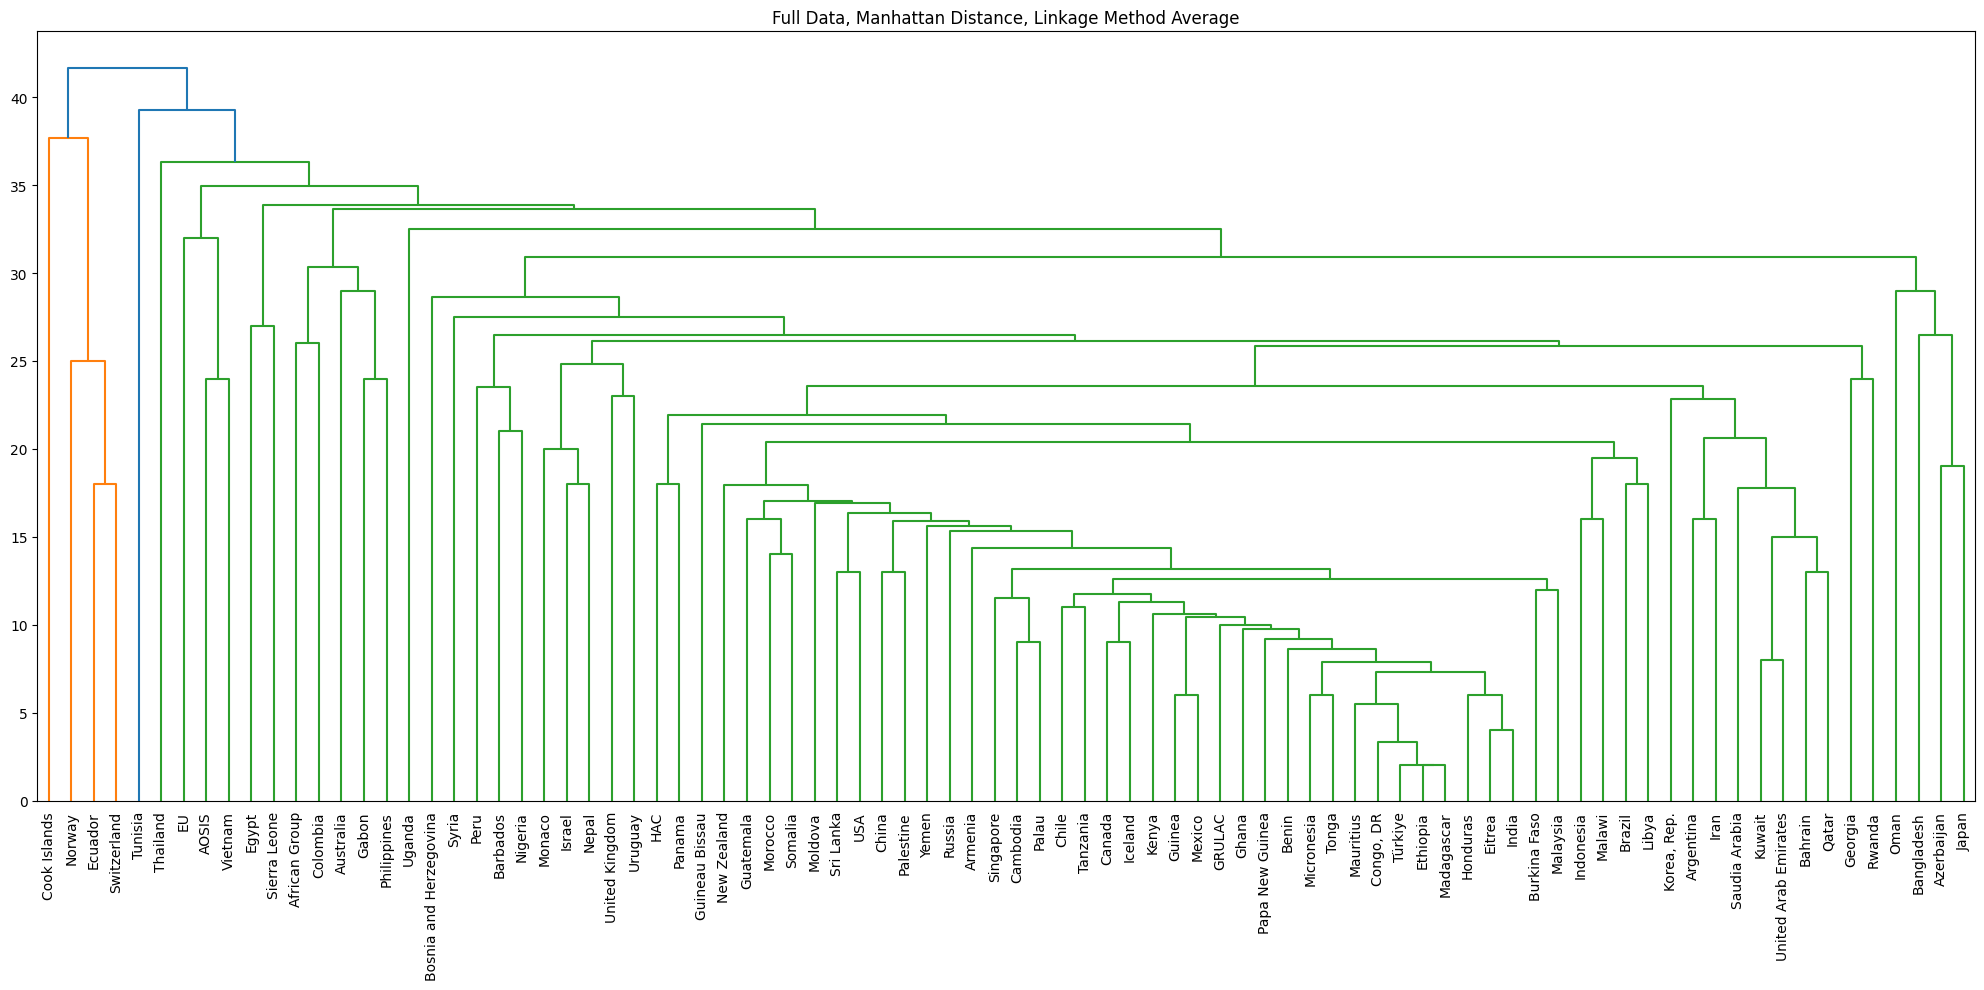

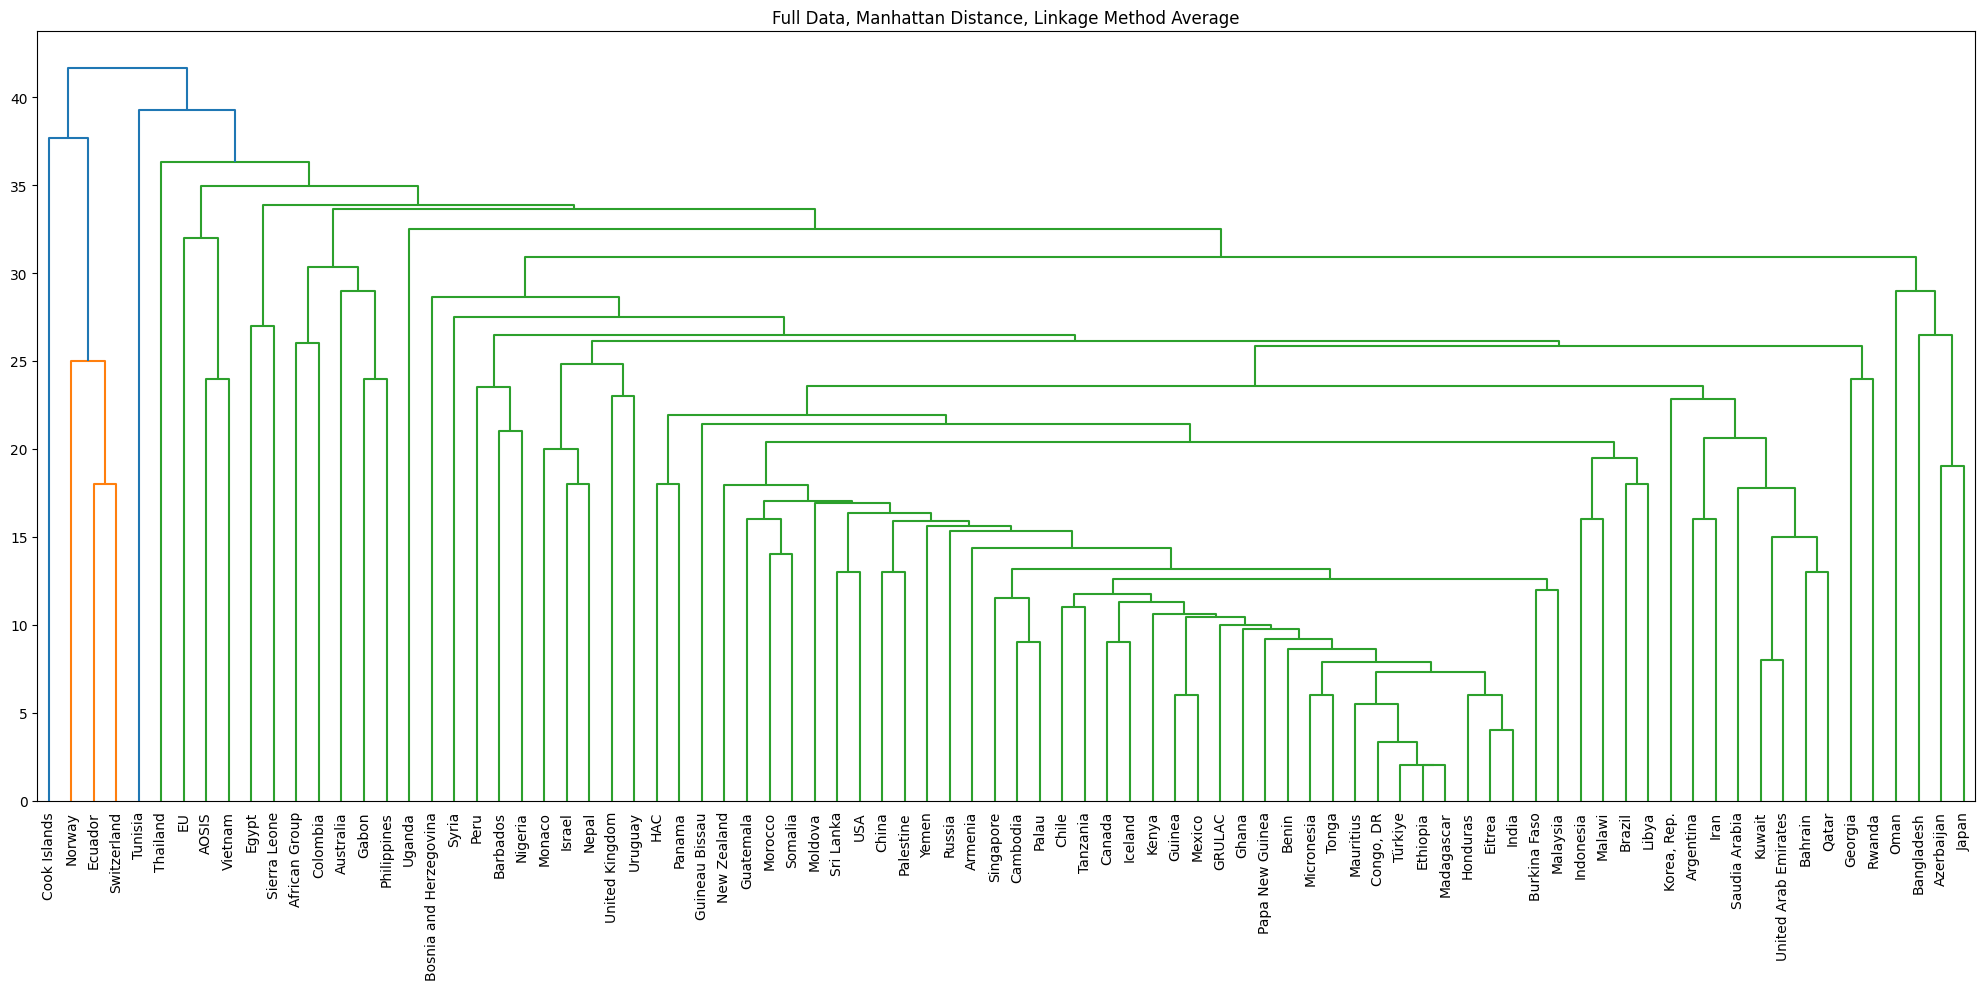

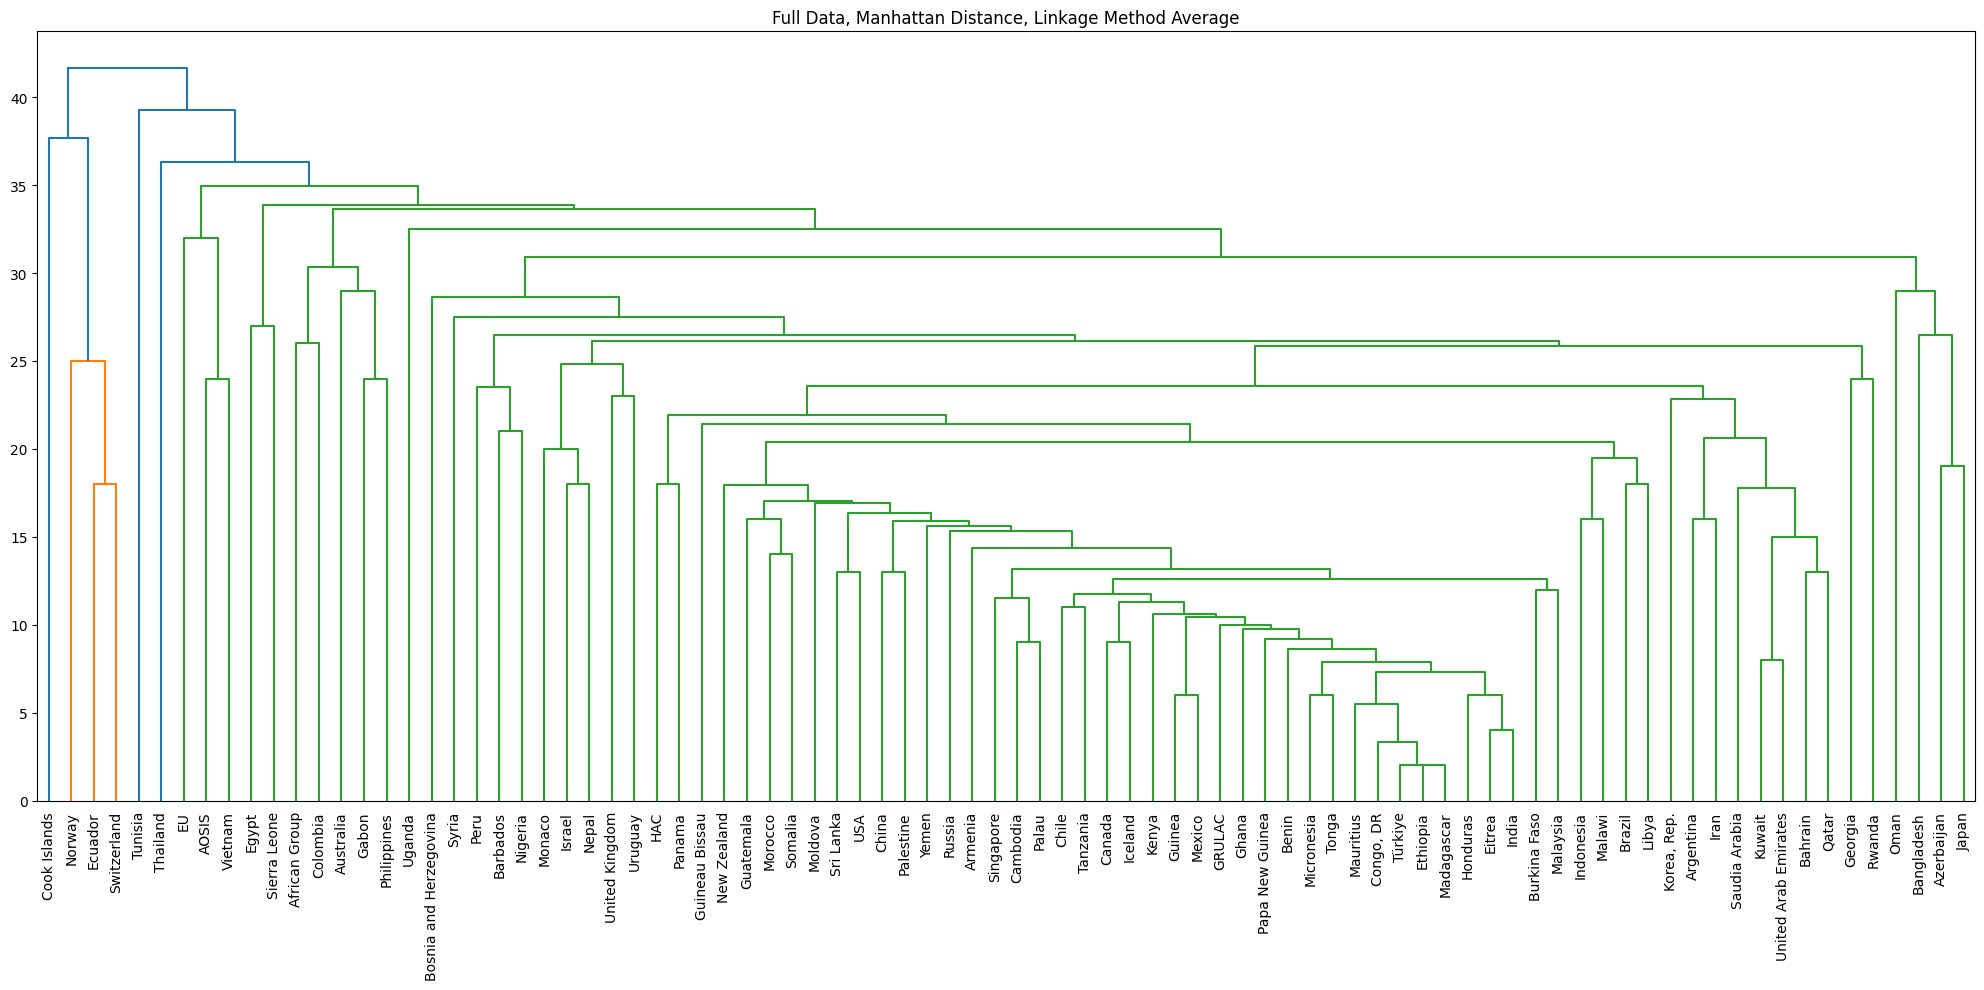

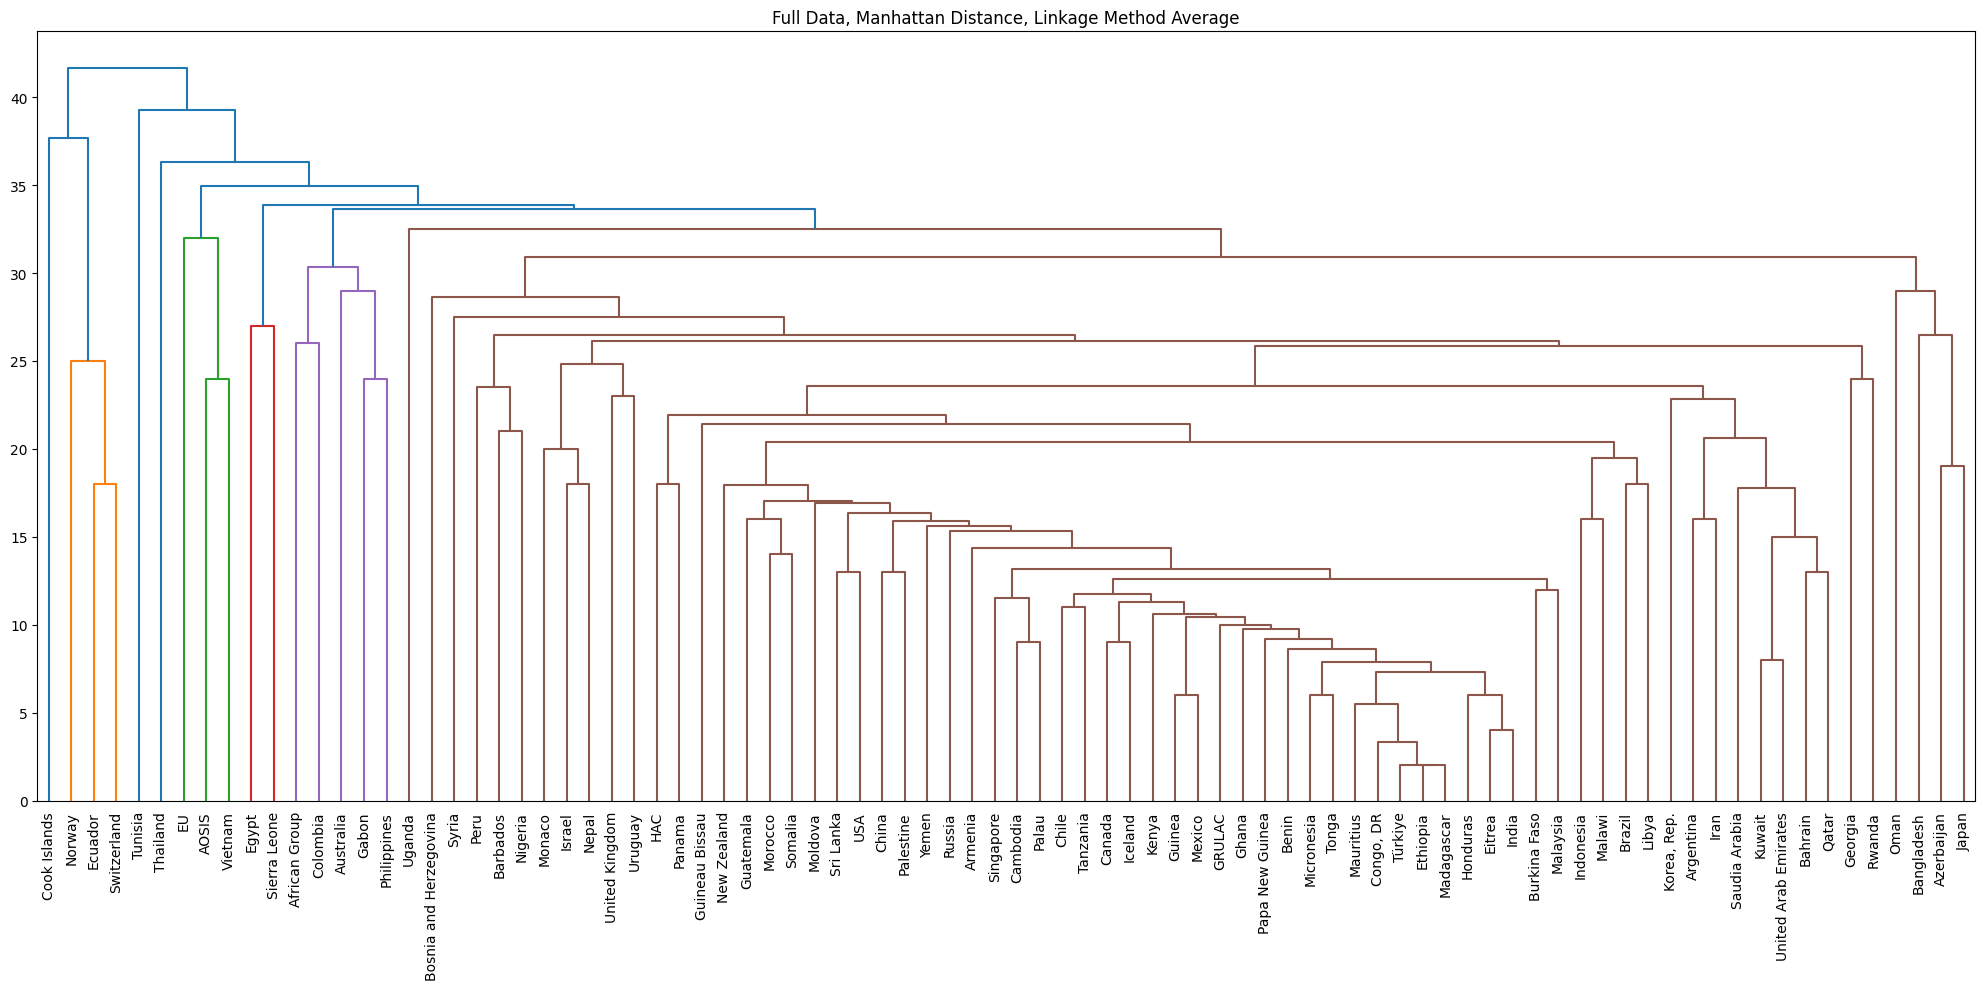

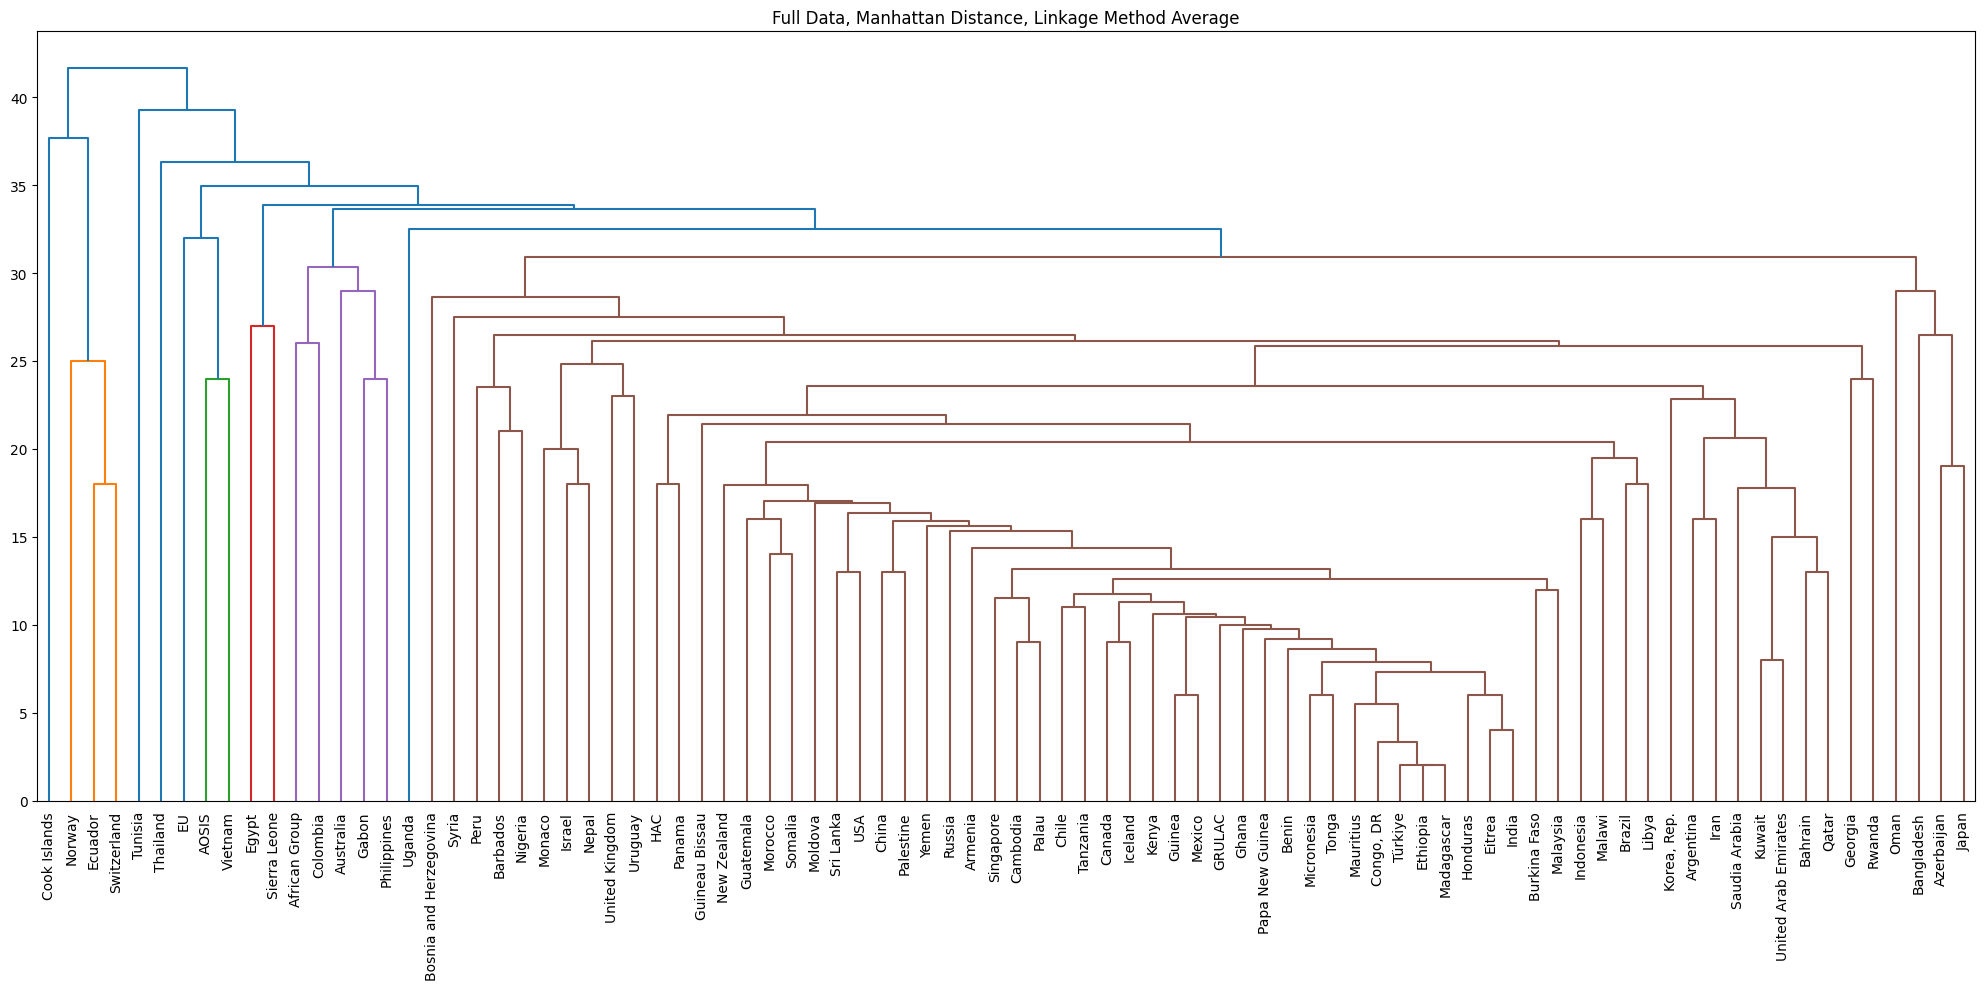

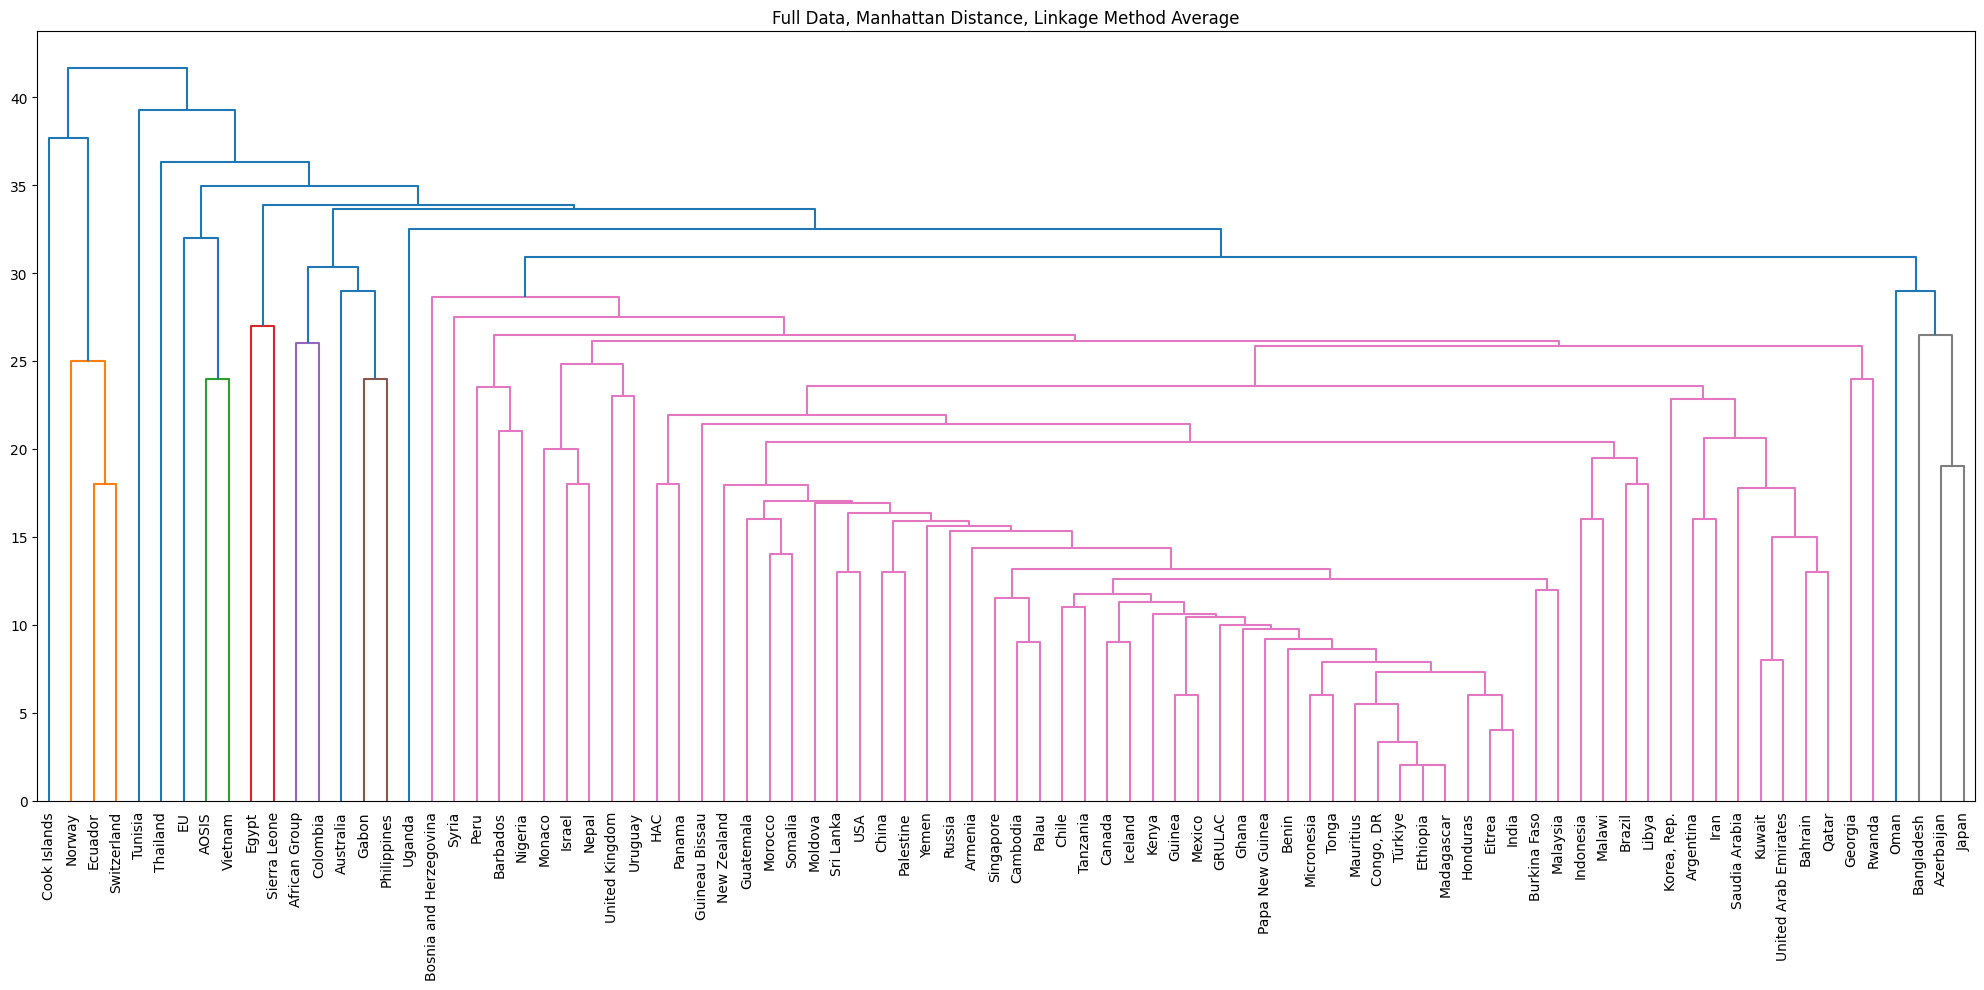

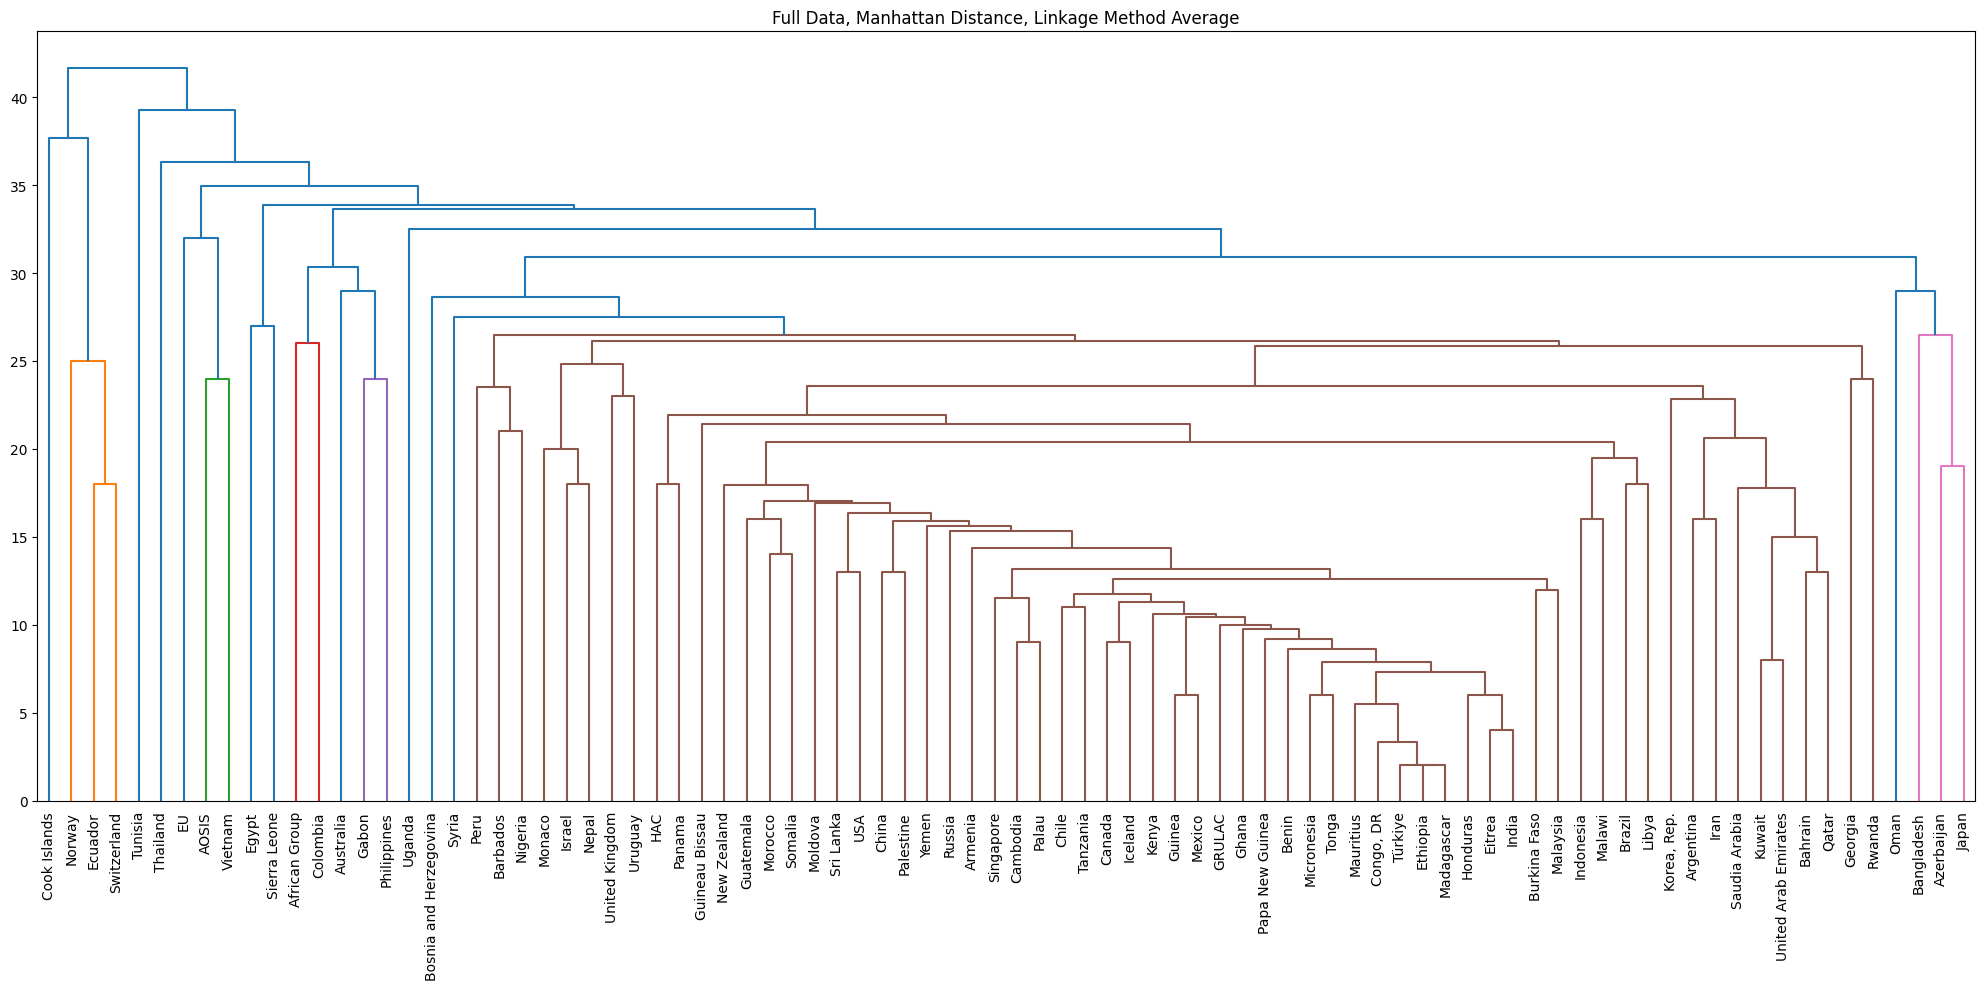

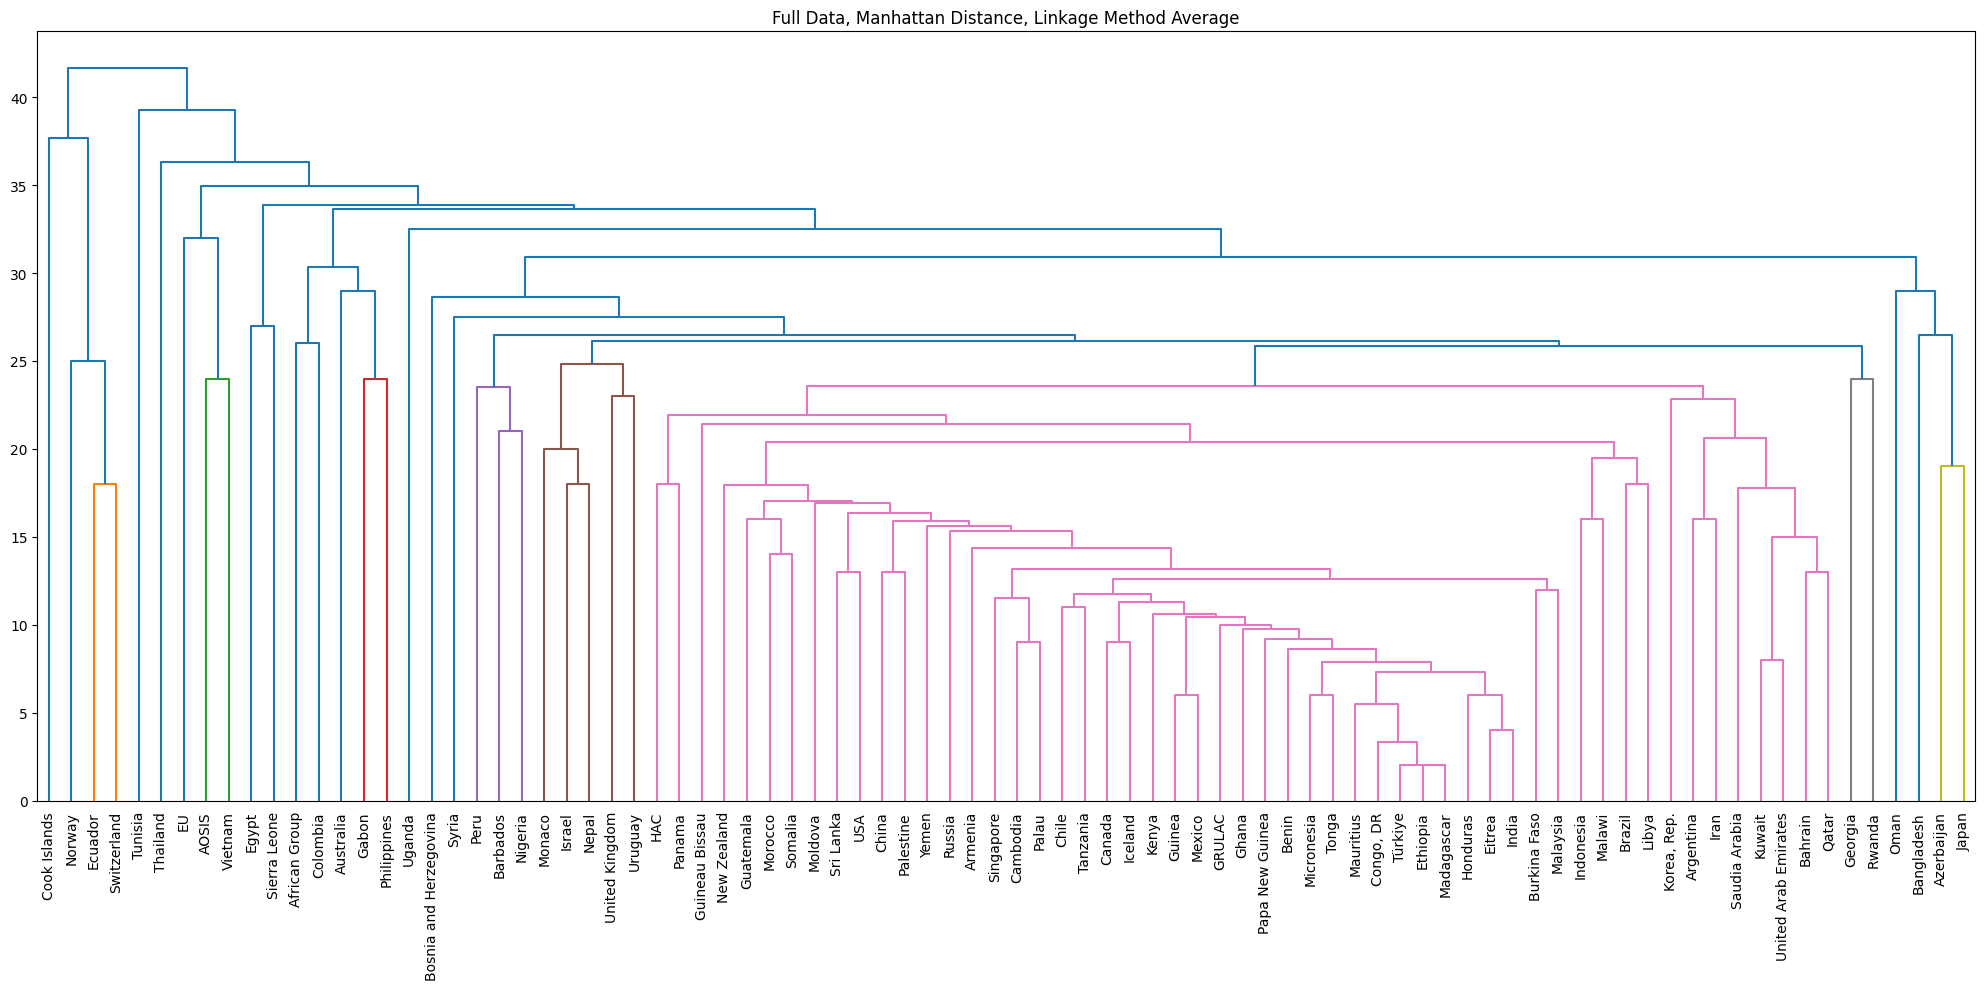

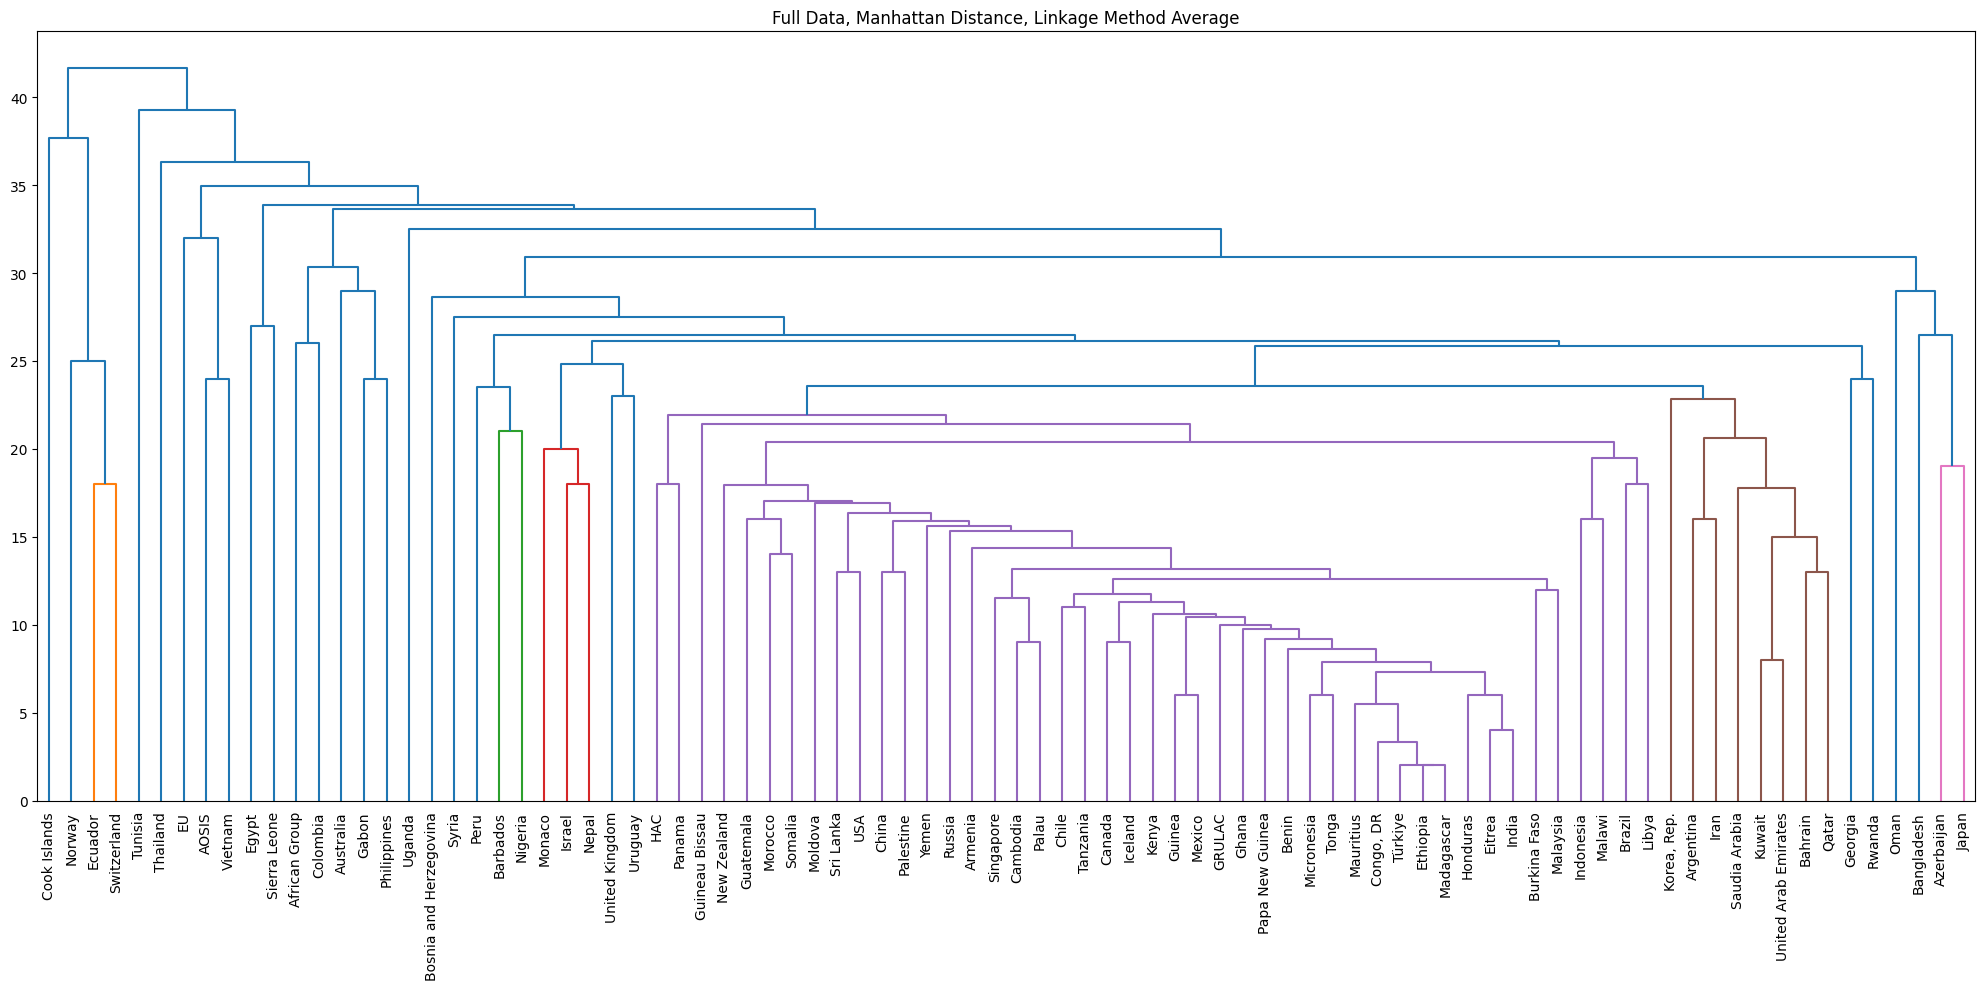

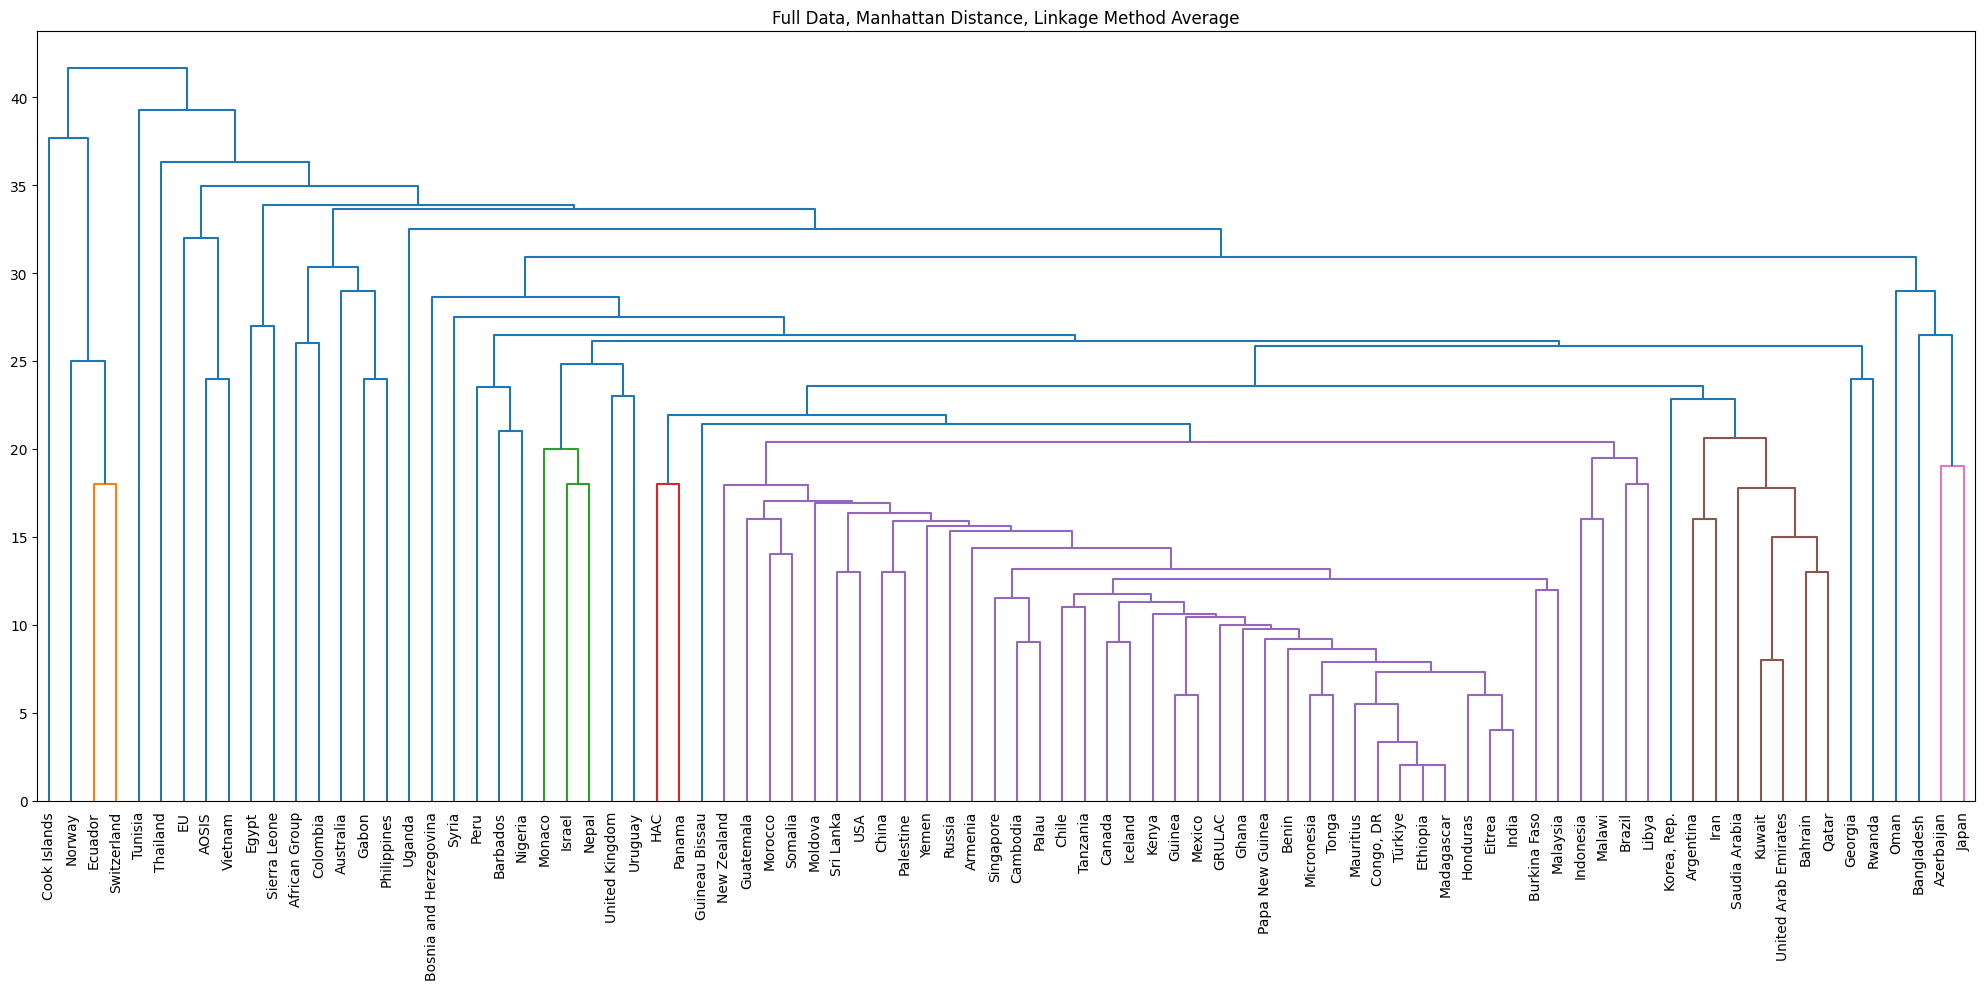

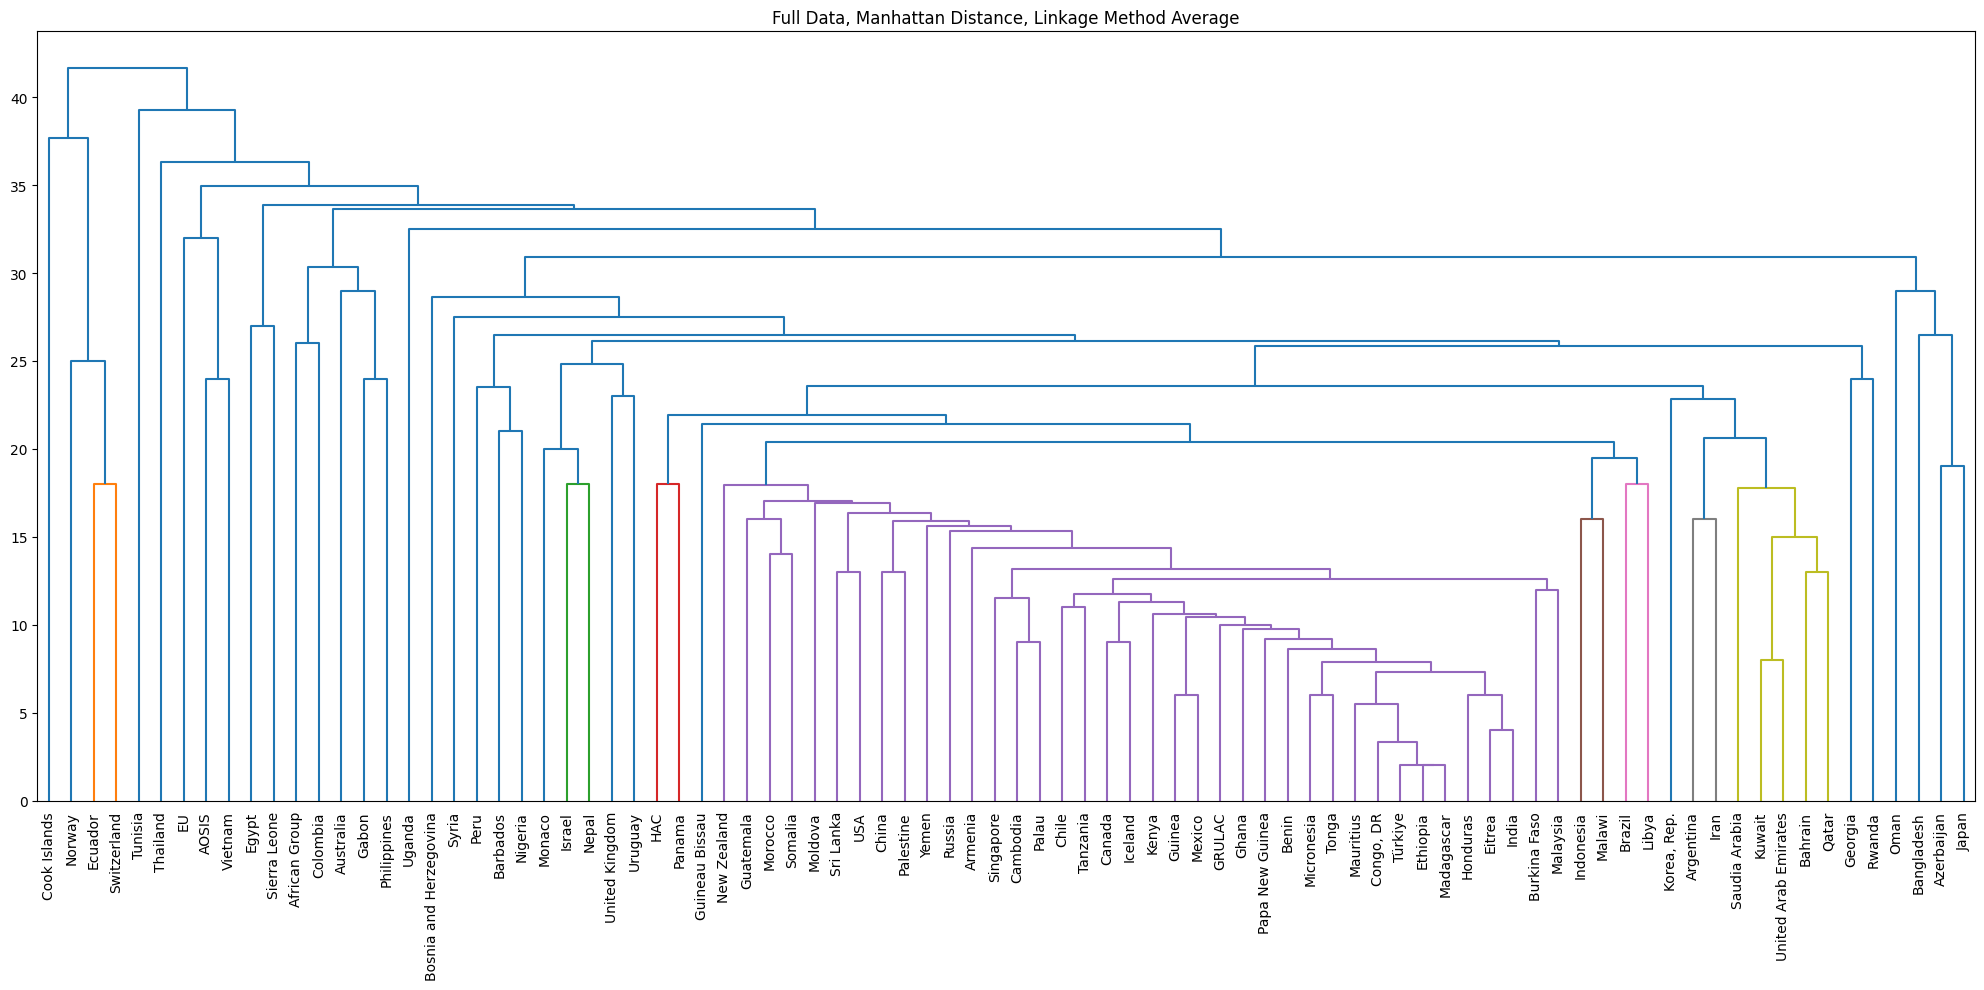

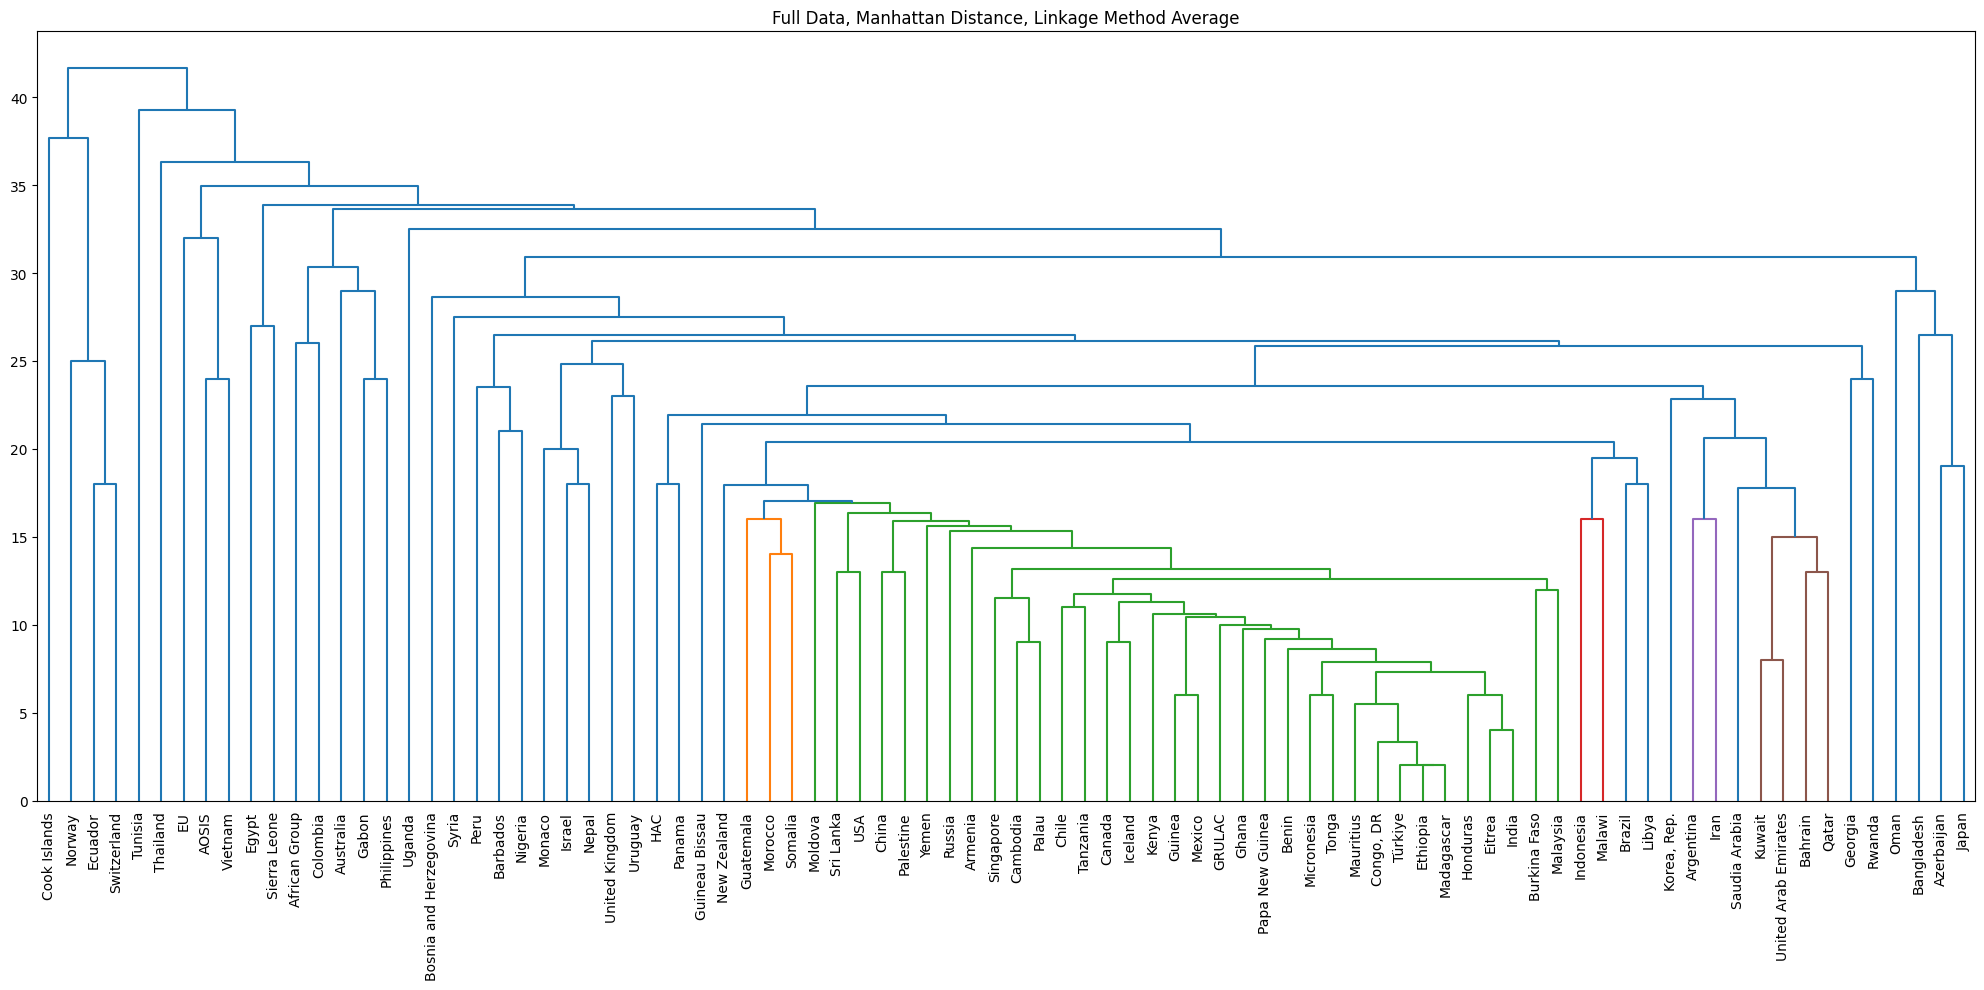

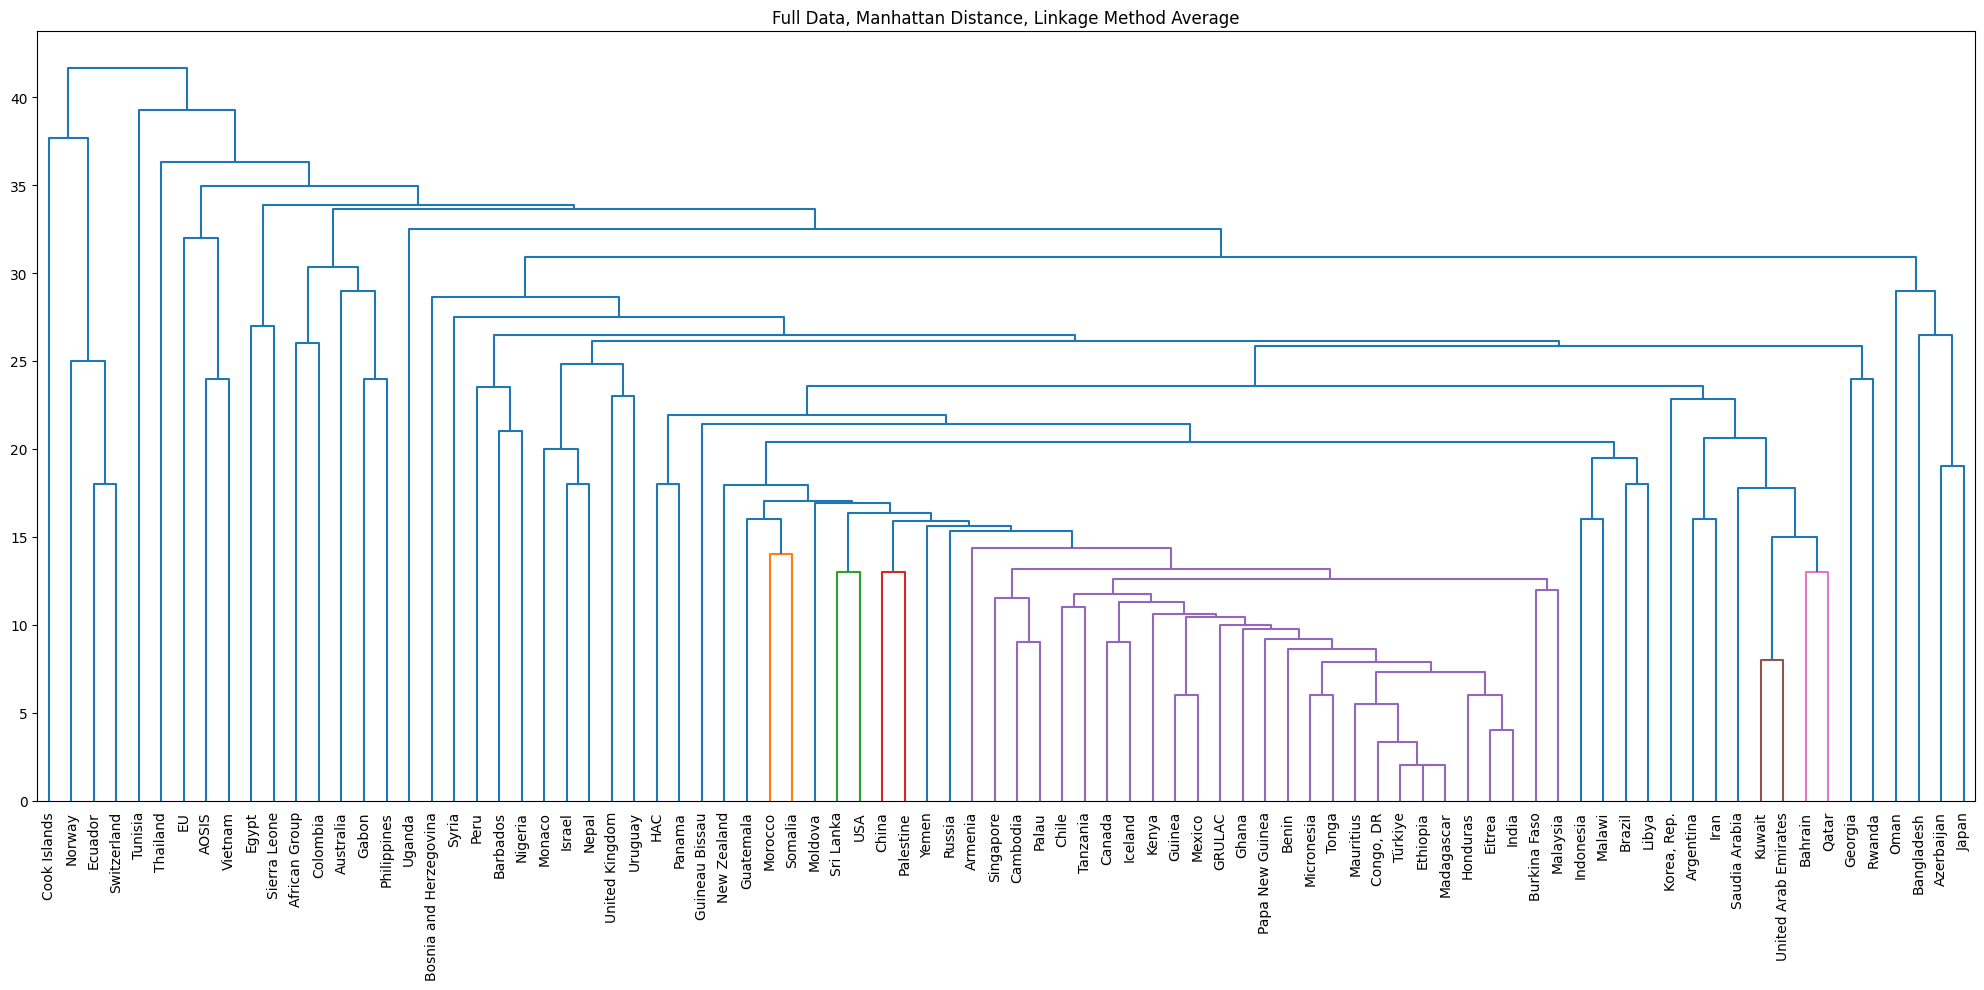

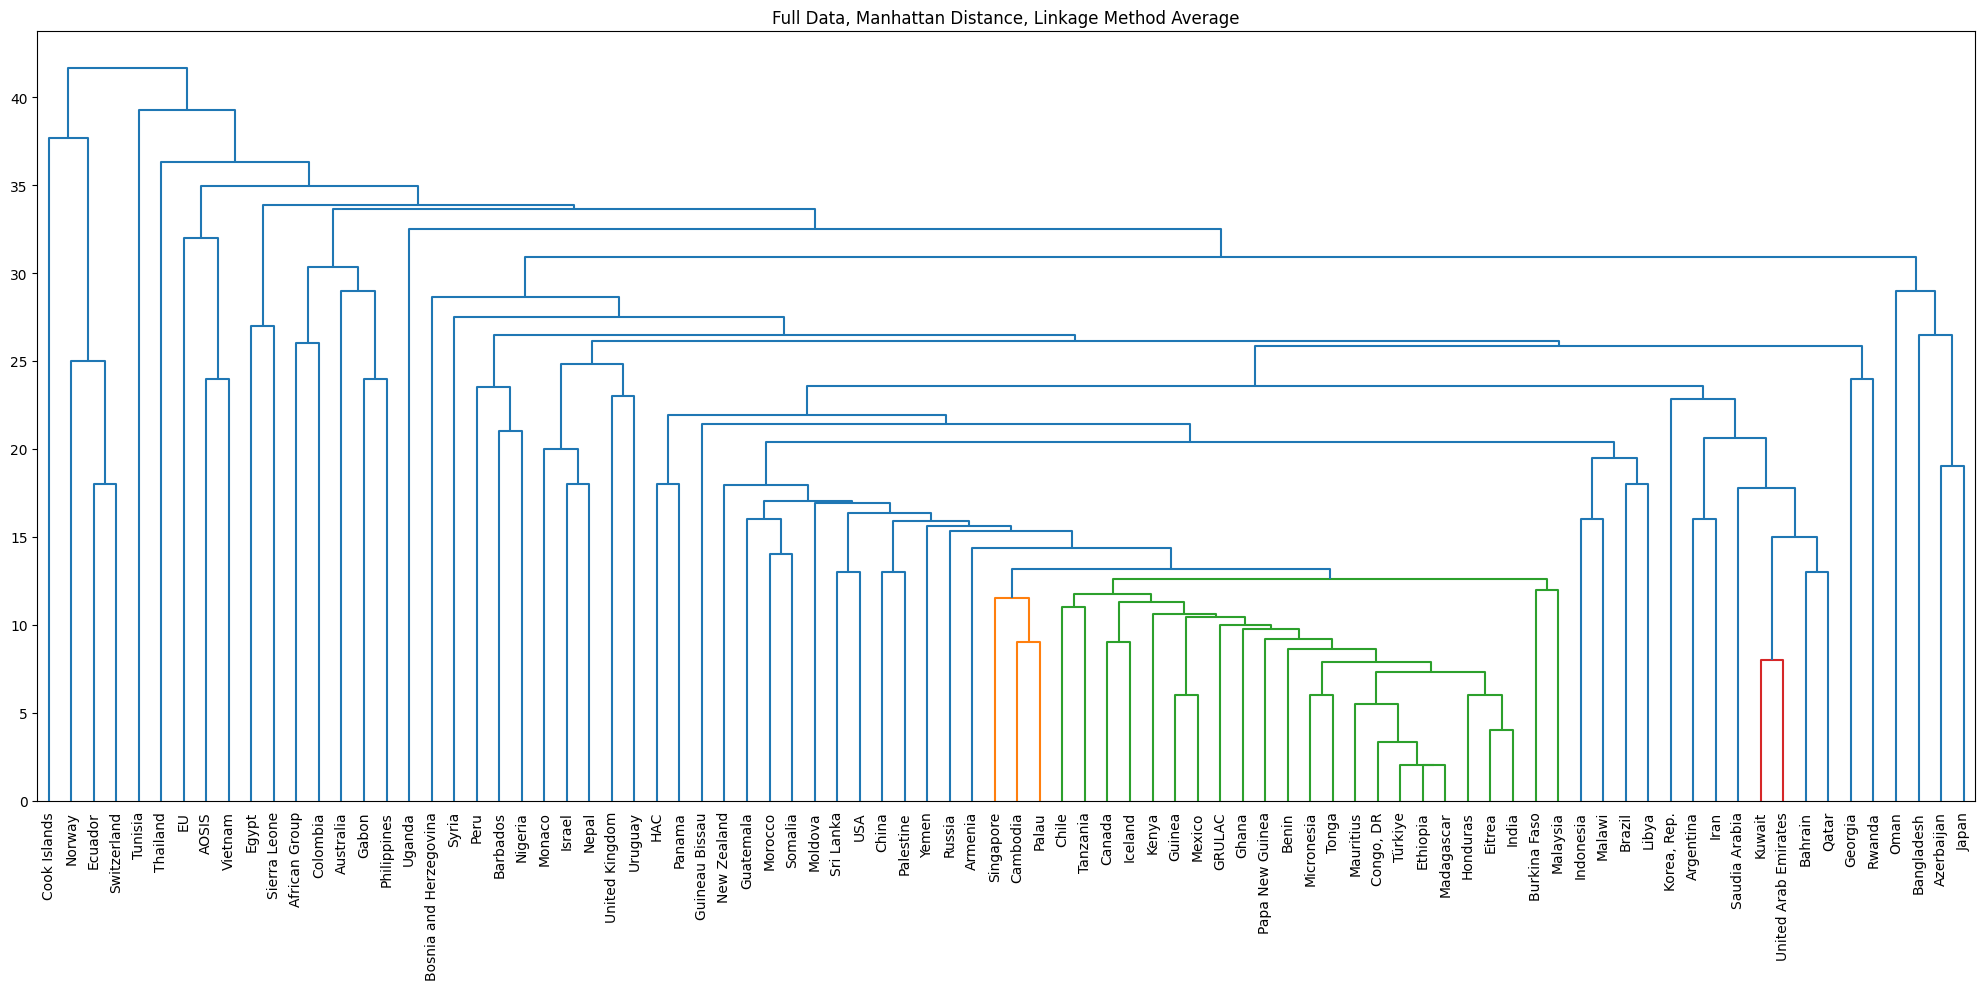

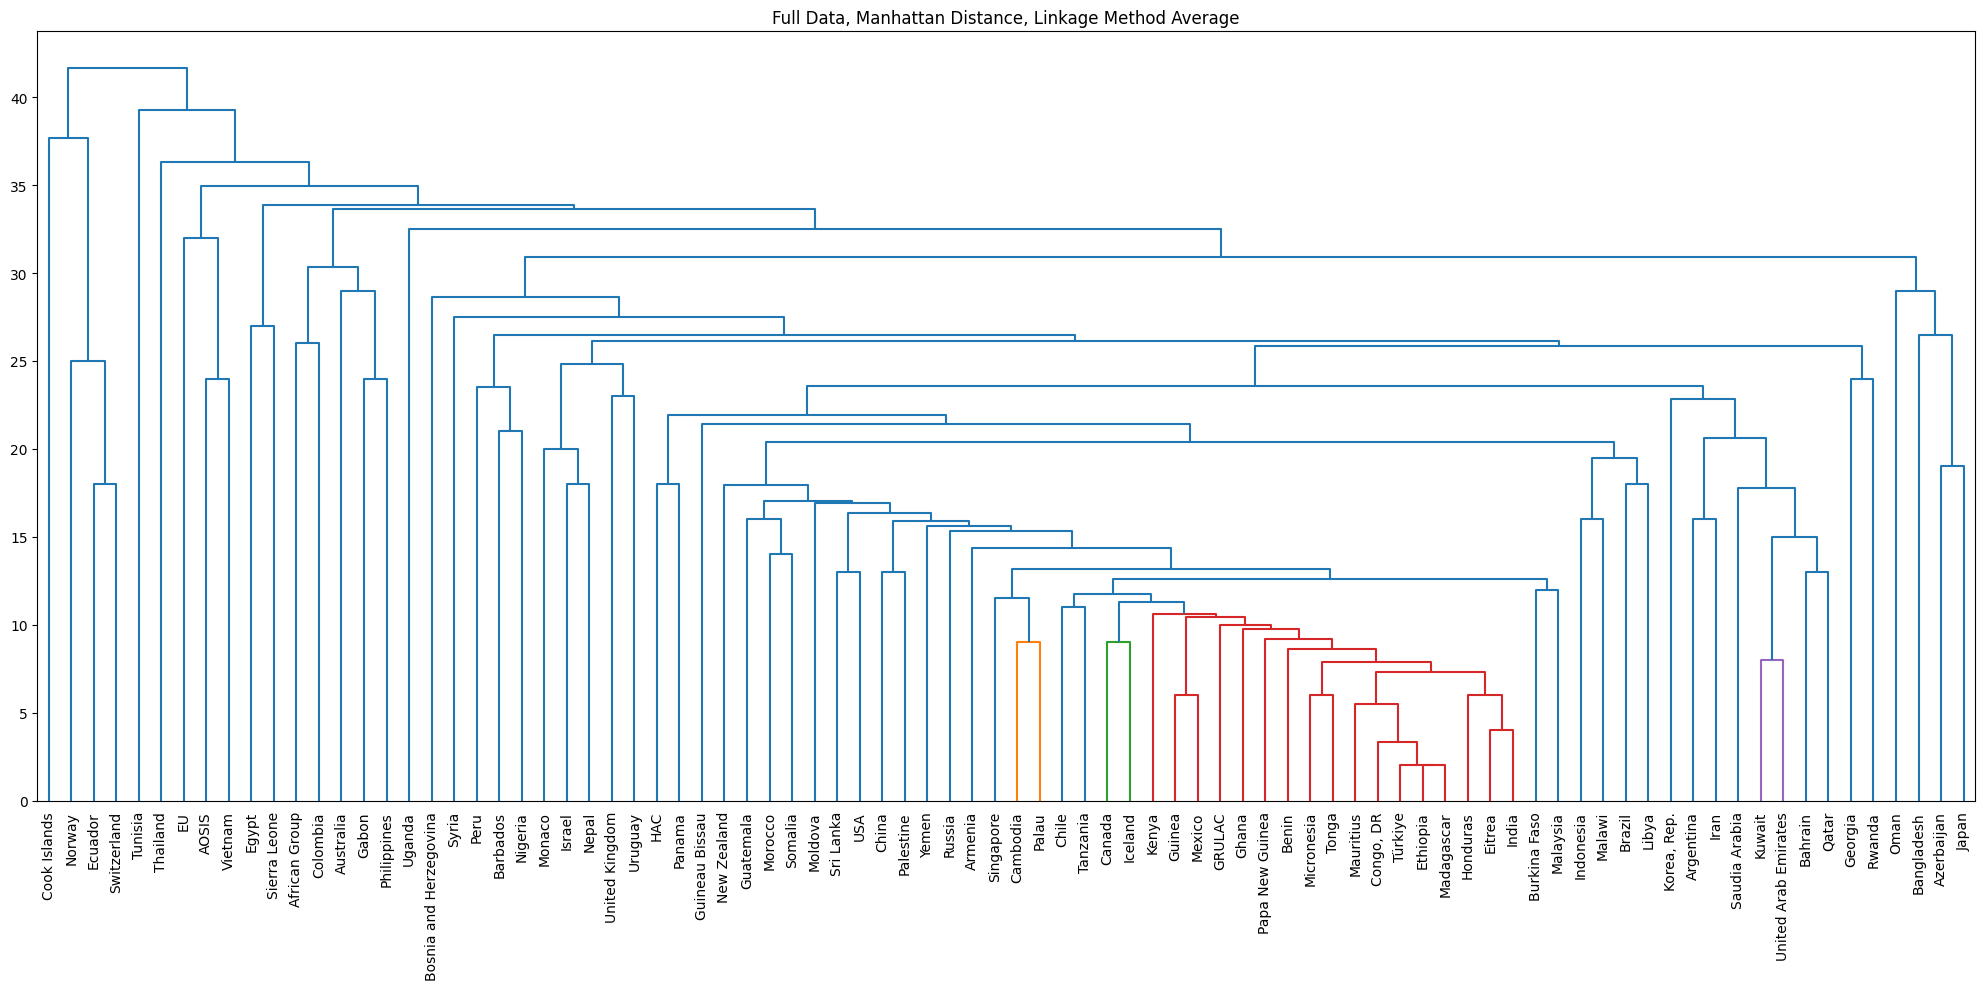

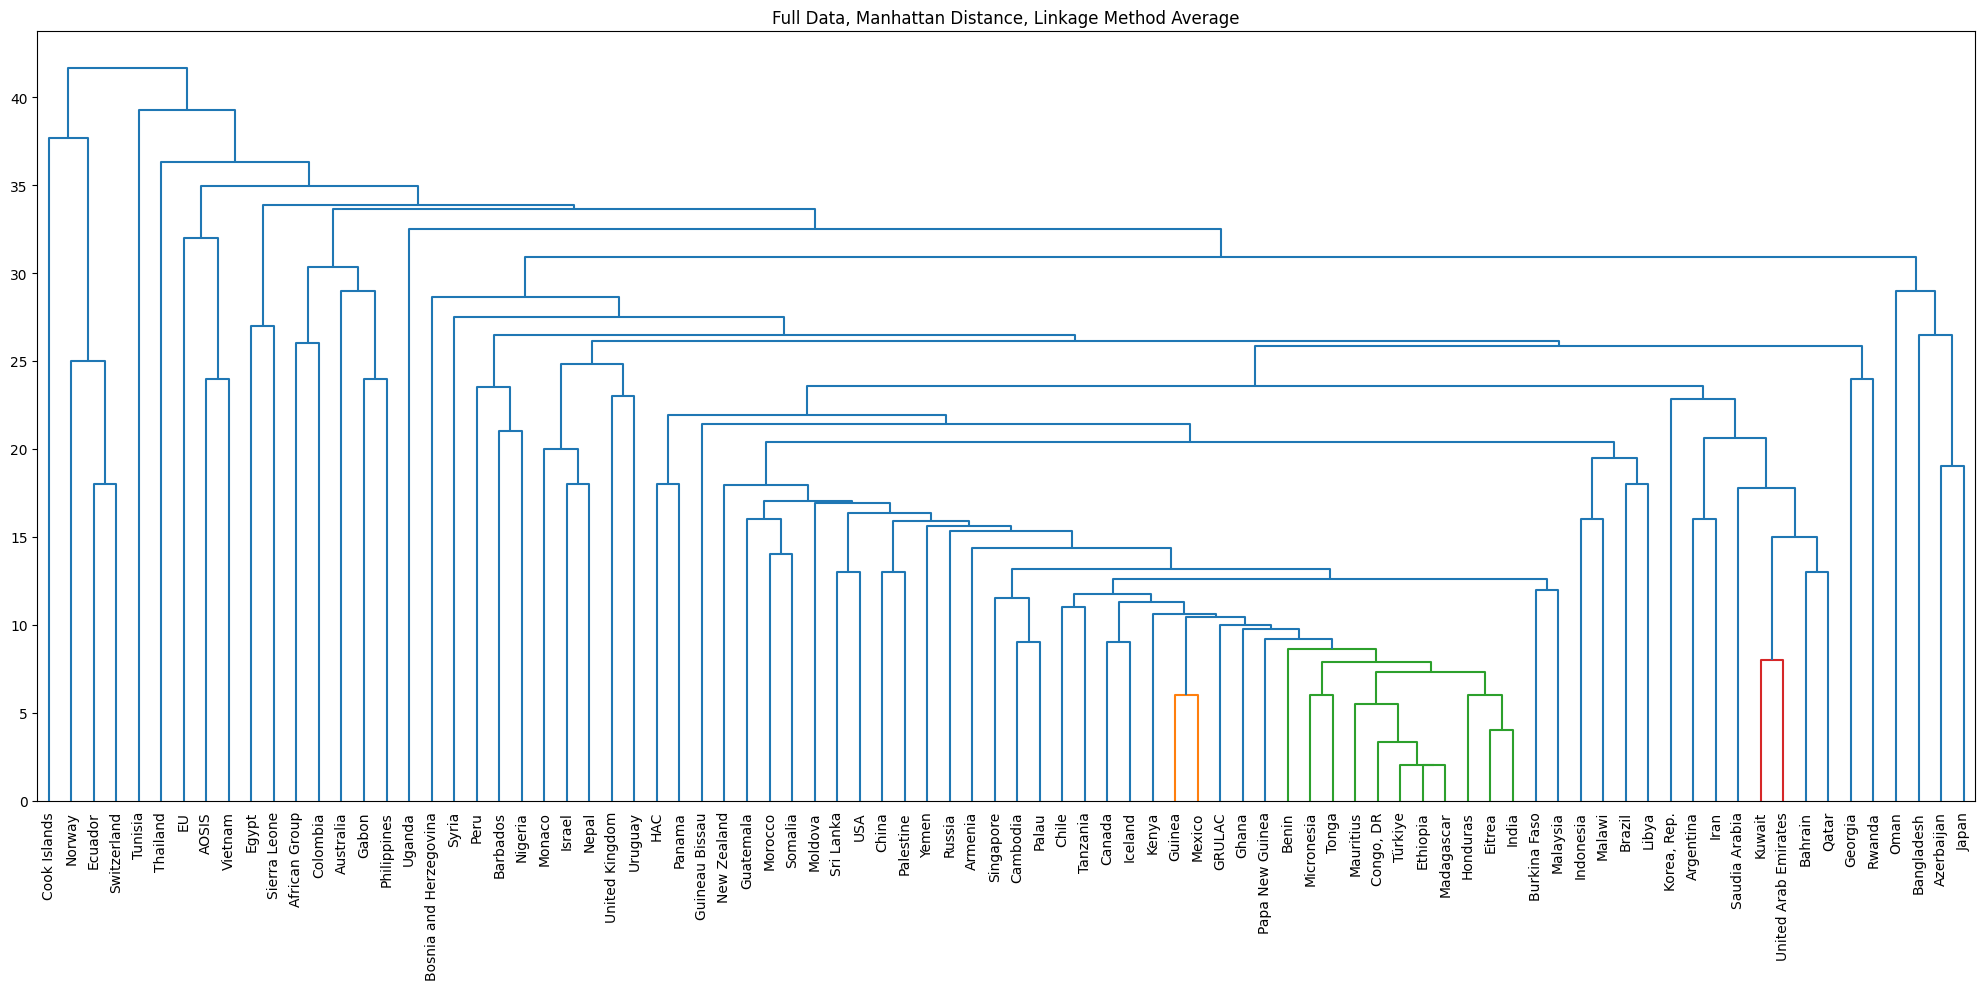

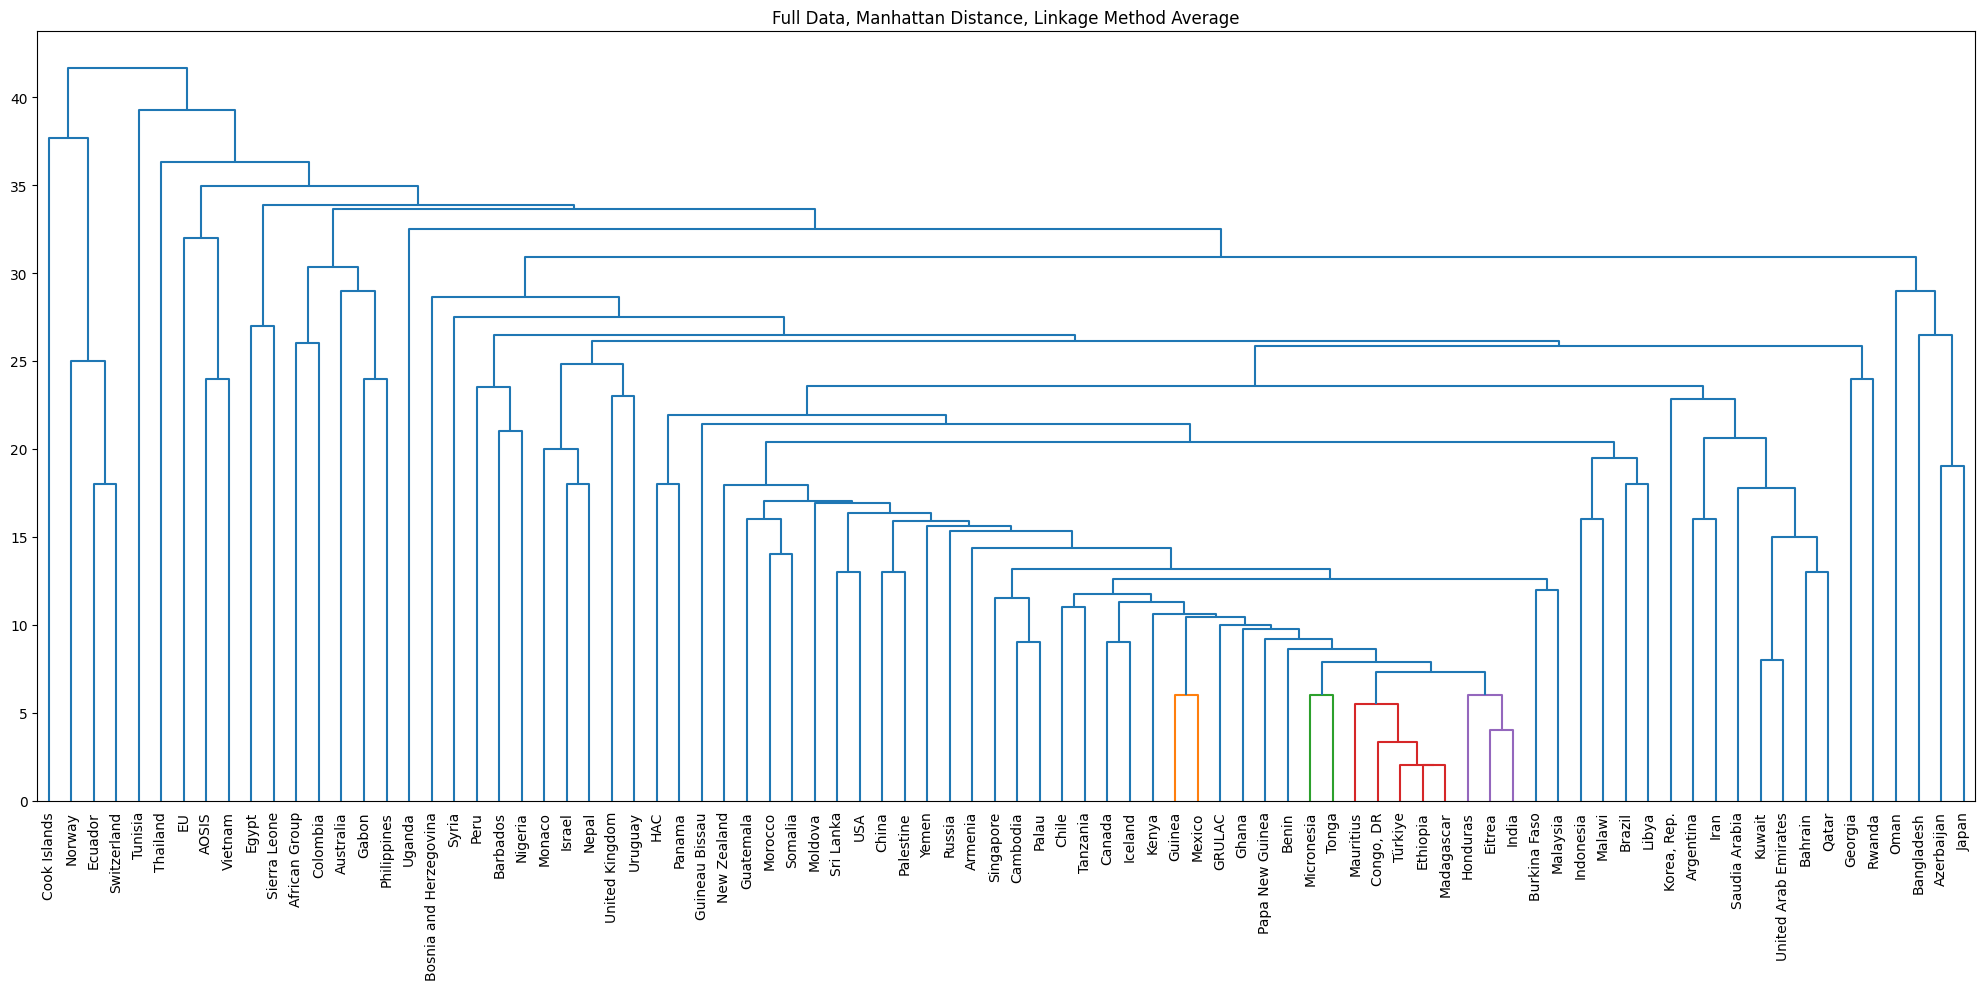

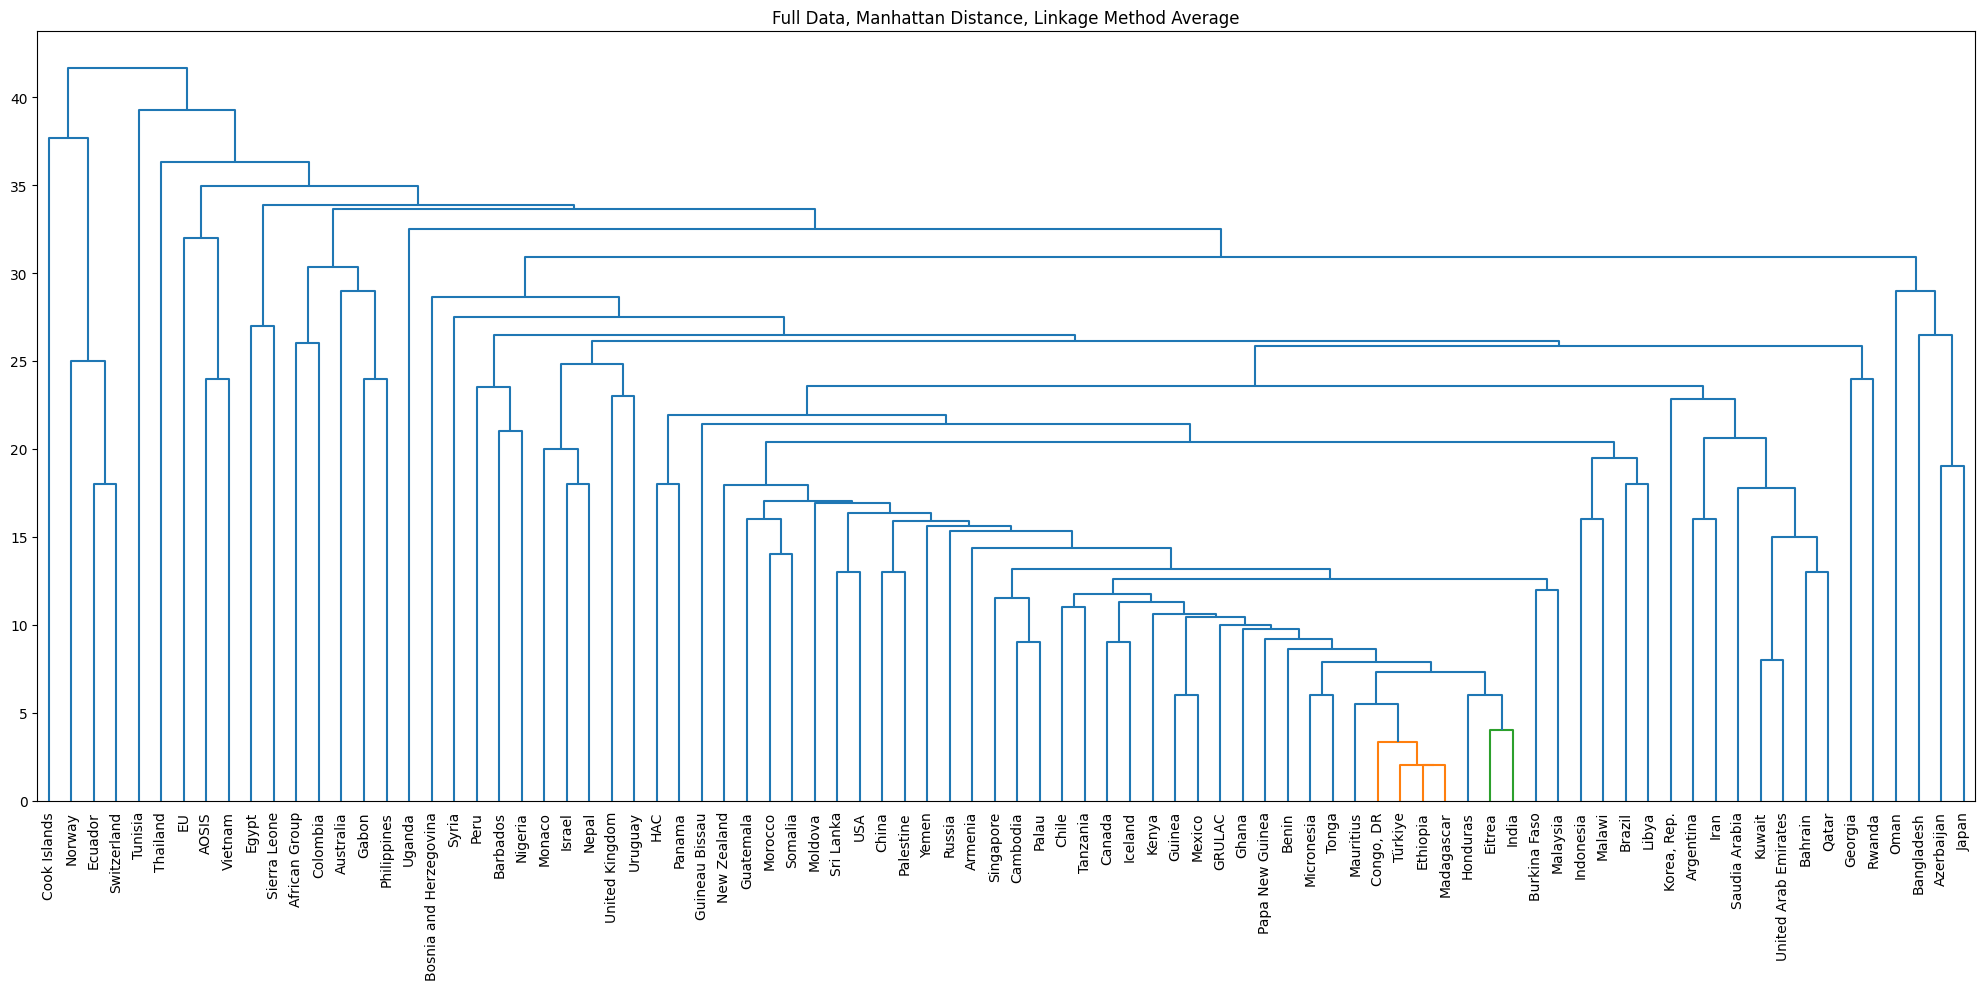

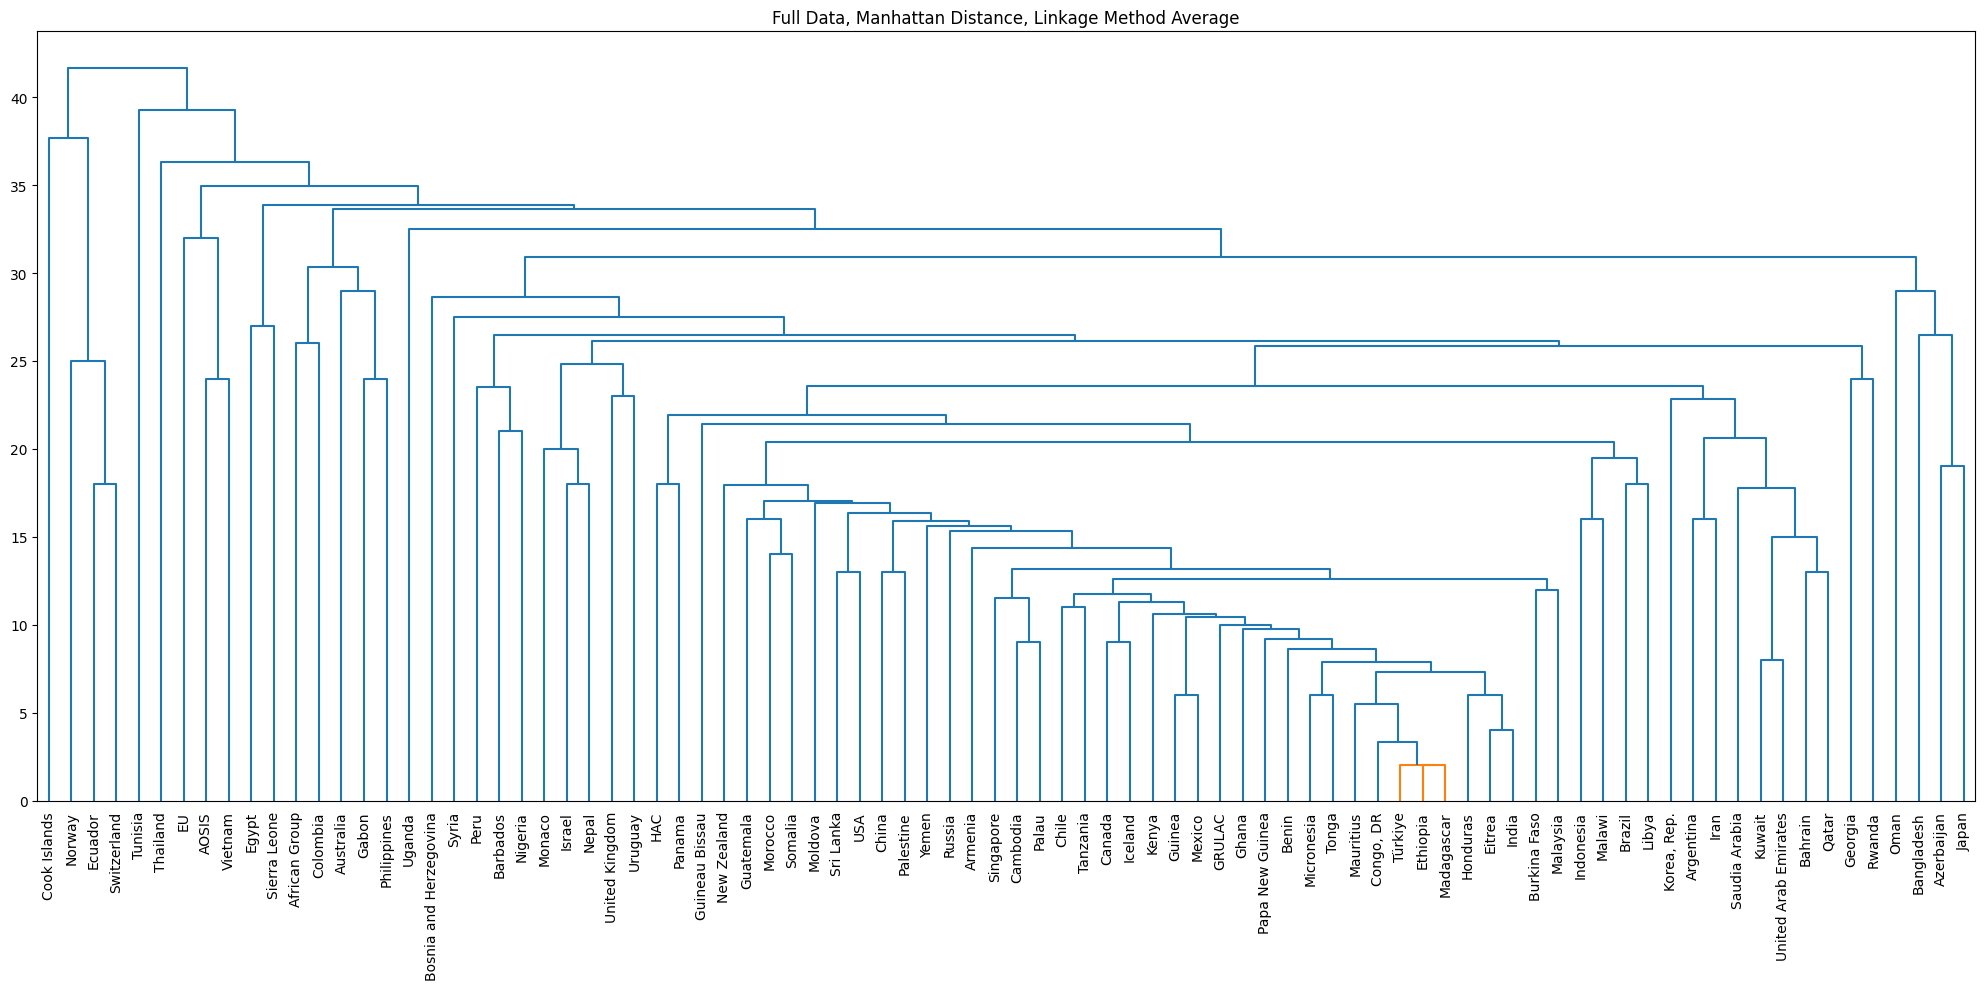

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(vectors, 'average', metric=manhattan_distance)
maximum = np.max(Z[:,2])
for i in range(20):
    
    threshold = int(maximum - i*2)
    fig, ax = plt.subplots(1,1,figsize=(25, 10))
    
    dn = dendrogram(Z, labels=countries, leaf_rotation=90, leaf_font_size=10, ax=ax, color_threshold=threshold)
    #save figure
    ax.set_ylim(-0.05)
    plt.title('Full Data, Manhattan Distance, Linkage Method Average')
    fig.savefig('Figures/Thresholds/threshold_'+str(threshold)+ '.png', bbox_inches='tight')
    plt.show()